### Problem statement:-

The aim of the project is to predict fraudulent credit card transactions using machine learning models. This is crucial from the bank’s as well as customer’s perspective. The banks cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions.

The dataset contains transactions made over a period of two days in September 2013 by European credit cardholders. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. We need to take care of the data imbalance while building the model and come up with the best model by trying various algorithms.


## Steps:-
The steps are broadly divided into below steps. The sub steps are also listed while we approach each of the steps.
1. Reading, understanding and visualising the data
2. Preparing the data for modelling
3. Building the model
4. Evaluate the model

In [58]:
# This was used while running the model in Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [59]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Importing XGBoost
from xgboost import XGBClassifier

# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [60]:
pd.set_option('display.max_columns', 500)

# Exploratory data analysis

## Reading and understanding the data

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [61]:
# Reading the dataset
df = pd.read_csv('/content/creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [62]:
df.shape

(284807, 31)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [64]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.239053e-15  1.673327e-15 -1.247012e-15  8.190001e-16  1.207294e-15   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   4.887456e-15  1.437716e-15 -3.772171e-16  9.564149e-16  1.039917e-15   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   6.406204e-16  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02

## Handling missing values

#### Handling missing values in columns

In [65]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

null
Time     0.0
V1       0.0
V2       0.0
V3       0.0
V4       0.0
V5       0.0
V6       0.0
V7       0.0
V8       0.0
V9       0.0
V10      0.0
V11      0.0
V12      0.0
V13      0.0
V14      0.0
V15      0.0
V16      0.0
V17      0.0
V18      0.0
V19      0.0
V20      0.0
V21      0.0
V22      0.0
V23      0.0
V24      0.0
V25      0.0
V26      0.0
V27      0.0
V28      0.0
Amount   0.0
Class    0.0

We can see that there is no missing values in any of the columns. Hence, there is no problem with null values in the entire dataset.

### Checking the distribution of the classes

In [66]:
classes = df['Class'].value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

In [67]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

np.float64(99.83)

In [68]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

np.float64(0.17)

We can see that there is only 0.17% frauds. We will take care of the class imbalance later.

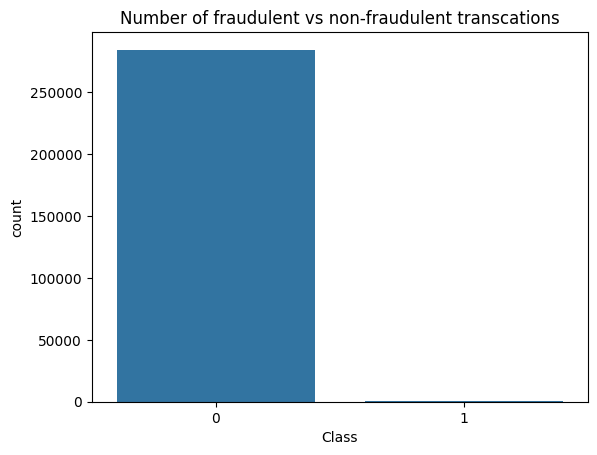

In [69]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

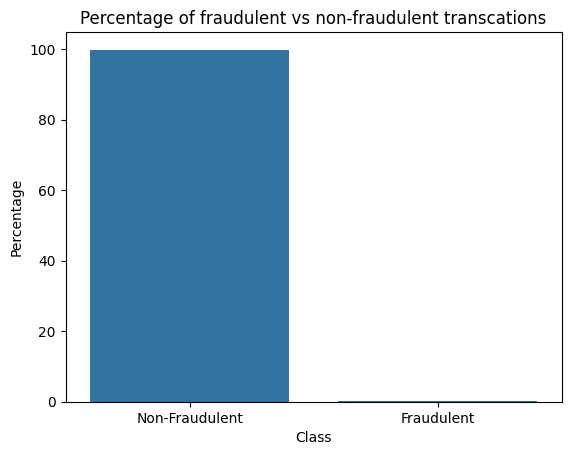

In [70]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

## Outliers treatment

In [71]:
# ----------- Outlier Check (Boxplots for selected features) ------------
# Boxplot for 'Amount' and a few PCA components
features_to_check = ['Amount', 'V1', 'V2', 'V3', 'V4', 'V5']

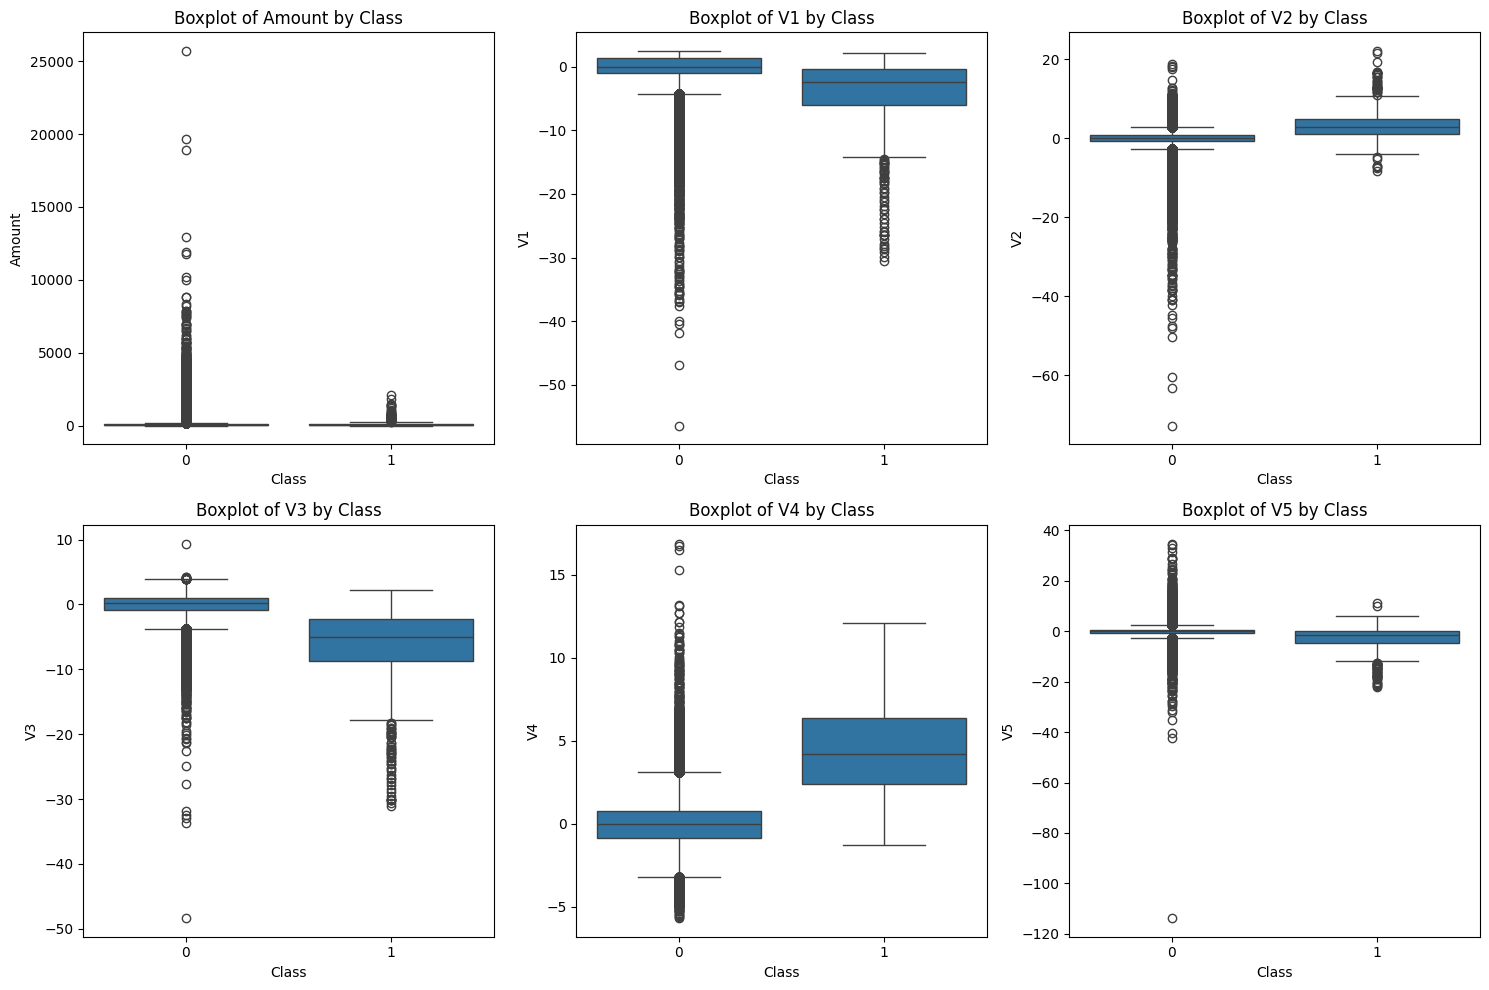

In [72]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_check):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Class')

plt.tight_layout()
plt.show()

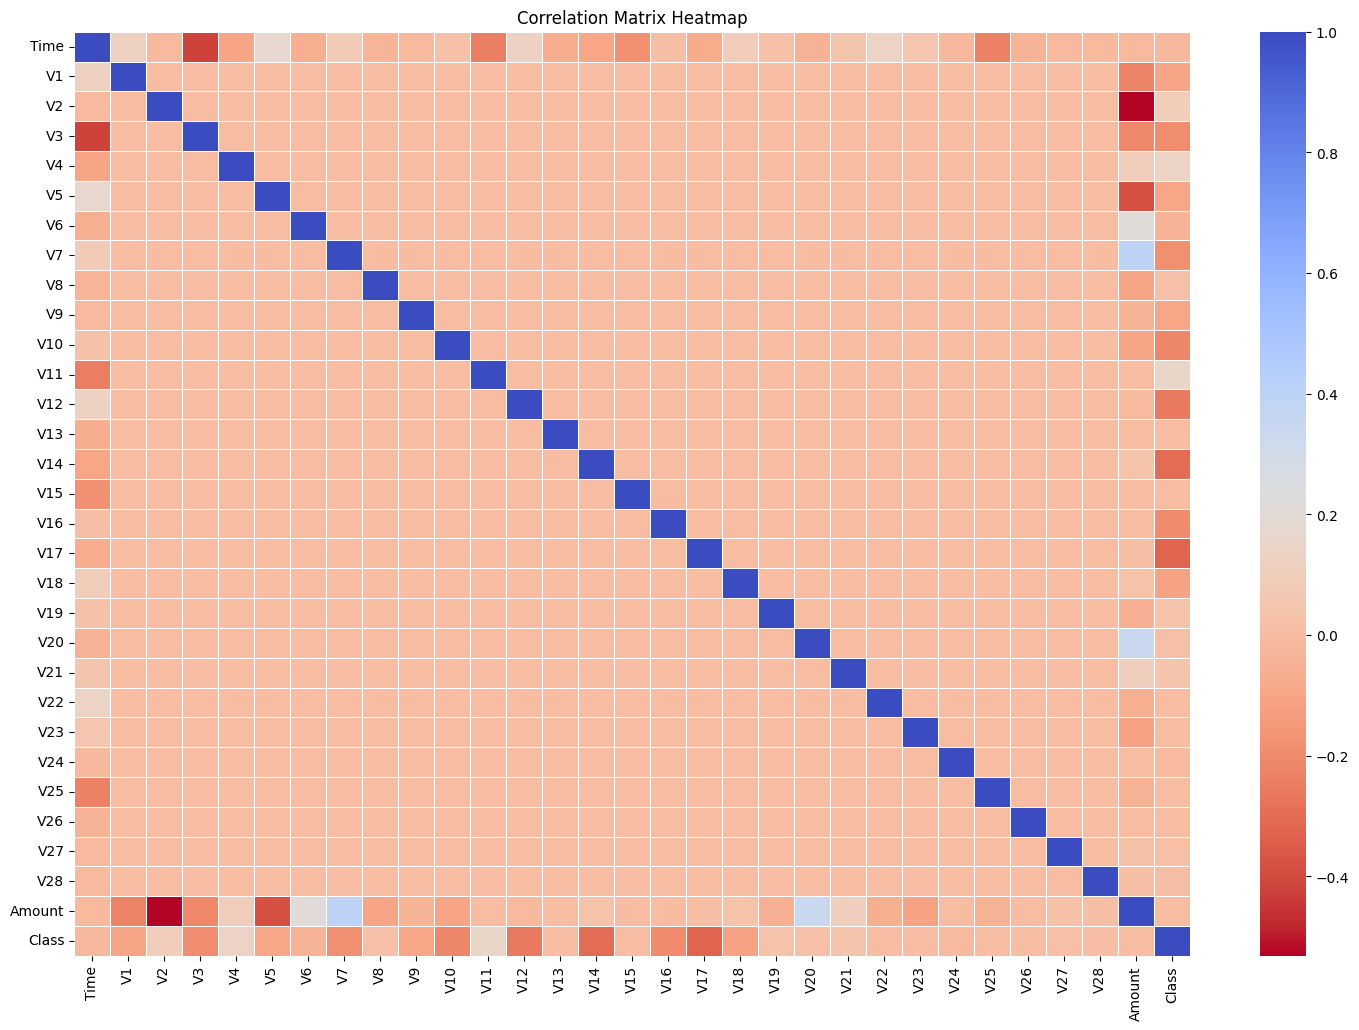

In [73]:
# ----------- Correlation Matrix ------------
plt.figure(figsize=(18, 12))
corr = df.corr()

# Plot the heatmap
sns.heatmap(corr, cmap='coolwarm_r', annot=False, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

### Observe the distribution of classes with time

In [74]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

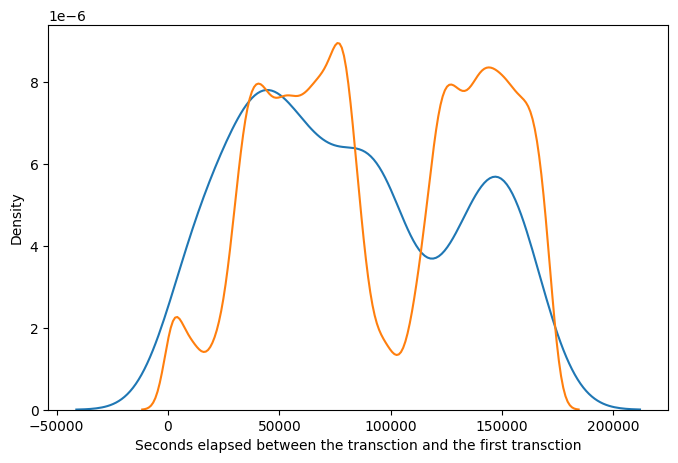

In [75]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

##### Analysis
We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time.

In [76]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

### Observe the distribution of classes with amount

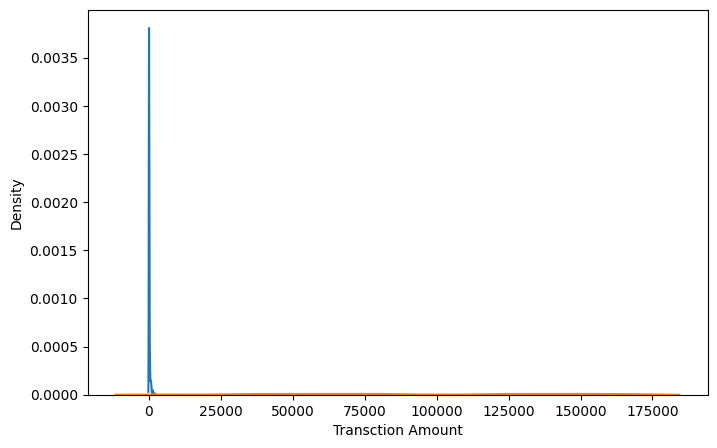

In [77]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

##### Analysis
We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

## Train-Test Split

In [78]:
# Import library
from sklearn.model_selection import train_test_split

In [79]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [80]:
# Putting target variable to y
y = df['Class']

In [81]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [82]:
print(X_train.columns)


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


## Feature Scaling
We need to scale only the `Amount`  column as all other columns are already scaled by the PCA transformation.

In [83]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [84]:
# Instantiate the Scaler
scaler = StandardScaler()

In [85]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [86]:
X_train.head()

V1        V2        V3        V4        V5        V6        V7  \
201788  2.023734 -0.429219 -0.691061 -0.201461 -0.162486  0.283718 -0.674694   
179369 -0.145286  0.736735  0.543226  0.892662  0.350846  0.089253  0.626708   
73138  -3.015846 -1.920606  1.229574  0.721577  1.089918 -0.195727 -0.462586   
208679  1.851980 -1.007445 -1.499762 -0.220770 -0.568376 -1.232633  0.248573   
206534  2.237844 -0.551513 -1.426515 -0.924369 -0.401734 -1.438232 -0.119942   

              V8        V9       V10       V11       V12       V13       V14  \
201788  0.192230  1.124319 -0.037763  0.308648  0.875063 -0.009562  0.116038   
179369 -0.049137 -0.732566  0.297692  0.519027  0.041275 -0.690783  0.647121   
73138   0.919341 -0.612193 -0.966197  1.106534  1.026421 -0.474229  0.641488   
208679 -0.539483 -0.813368  0.785431 -0.784316  0.673626  1.428269  0.043937   
206534 -0.449263 -0.717258  0.851668 -0.497634 -0.445482  0.324575  0.125543   

             V15       V16       V17       V18       V19       V20       V21  \
201788  0.086537  0.628337 -0.997868  0.482547  0.576077 -0.171390 -0.195207   
179369  0.526333 -1.098558  0.511739  0.243984  3.349611  0.206709 -0.124288   
73138  -0.430684 -0.631257  0.634633 -0.718062 -0.039929  0.842838  0.274911   
208679 -0.309507 -1.805728 -0.012118  0.377096 -0.658353 -0.196551 -0.406722   
206534  0.266588  0.802640  0.225312 -1.865494  0.621879 -0.045417  0.050447   

             V22       V23       V24       V25       V26       V27       V28  \
201788 -0.477813  0.340513  0.059174 -0.431015 -0.297028 -0.000063 -0.046947   
179369 -0.263560 -0.110568 -0.434224 -0.509076  0.719784 -0.006357  0.146053   
73138  -0.319550  0.212891 -0.268792  0.241190  0.318445 -0.100726 -0.365257   
208679 -0.899081  0.137370  0.075894 -0.244027  0.455618 -0.094066 -0.031488   
206534  0.125601  0.215531 -0.080485 -0.063975 -0.307176 -0.042838 -0.063872   

          Amount  
201788 -0.345273  
179369 -0.206439  
73138   0.358043  
208679  0.362400  
206534 -0.316109

##### Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [87]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

V1        V2        V3        V4        V5        V6        V7  \
49089   1.229452 -0.235478 -0.627166  0.419877  1.797014  4.069574 -0.896223   
154704  2.016893 -0.088751 -2.989257 -0.142575  2.675427  3.332289 -0.652336   
67247   0.535093 -1.469185  0.868279  0.385462 -1.439135  0.368118 -0.499370   
251657  2.128486 -0.117215 -1.513910  0.166456  0.359070 -0.540072  0.116023   
201903  0.558593  1.587908 -2.368767  5.124413  2.171788 -0.500419  1.059829   

              V8        V9       V10       V11       V12       V13       V14  \
49089   1.036103  0.745991 -0.147304 -0.850459  0.397845 -0.259849 -0.277065   
154704  0.752811  1.962566 -1.025024  1.126976 -2.418093  1.250341 -0.056209   
67247   0.303698  1.042073 -0.437209  1.145725  0.907573 -1.095634 -0.055080   
251657 -0.216140  0.680314  0.079977 -1.705327 -0.127579 -0.207945  0.307878   
201903 -0.254233 -1.959060  0.948915 -0.288169 -1.007647  0.470316 -2.771902   

             V15       V16       V17       V18       V19       V20       V21  \
49089  -0.766810 -0.200946 -0.338122  0.006032  0.477431 -0.057922 -0.170060   
154704 -0.736695  0.014783  1.890249  0.333755 -0.450398 -0.147619 -0.184153   
67247  -0.621880 -0.191066  0.311988 -0.478635  0.231159  0.437685  0.028010   
251657  0.213491  0.163032 -0.587029 -0.561292  0.472667 -0.227278 -0.357993   
201903  0.221958  0.354333  2.603189  1.092576  0.668084  0.249457 -0.035049   

             V22       V23       V24       V25       V26       V27       V28  \
49089  -0.288750 -0.130270  1.025935  0.847990 -0.271476  0.060052  0.018104   
154704 -0.089661  0.087188  0.570679  0.101899  0.620842 -0.048958 -0.042831   
67247  -0.384708 -0.128376  0.286638 -0.136700  0.913904 -0.083364  0.052485   
251657 -0.905085  0.223474 -1.075605 -0.188519  0.267672 -0.071733 -0.072238   
201903  0.271455  0.381606  0.332001 -0.334757  0.448890  0.168585  0.004955   

          Amount  
49089  -0.340485  
154704 -0.320859  
67247   0.853442  
251657 -0.344410  
201903 -0.229480

## Checking the Skewness

In [88]:
# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

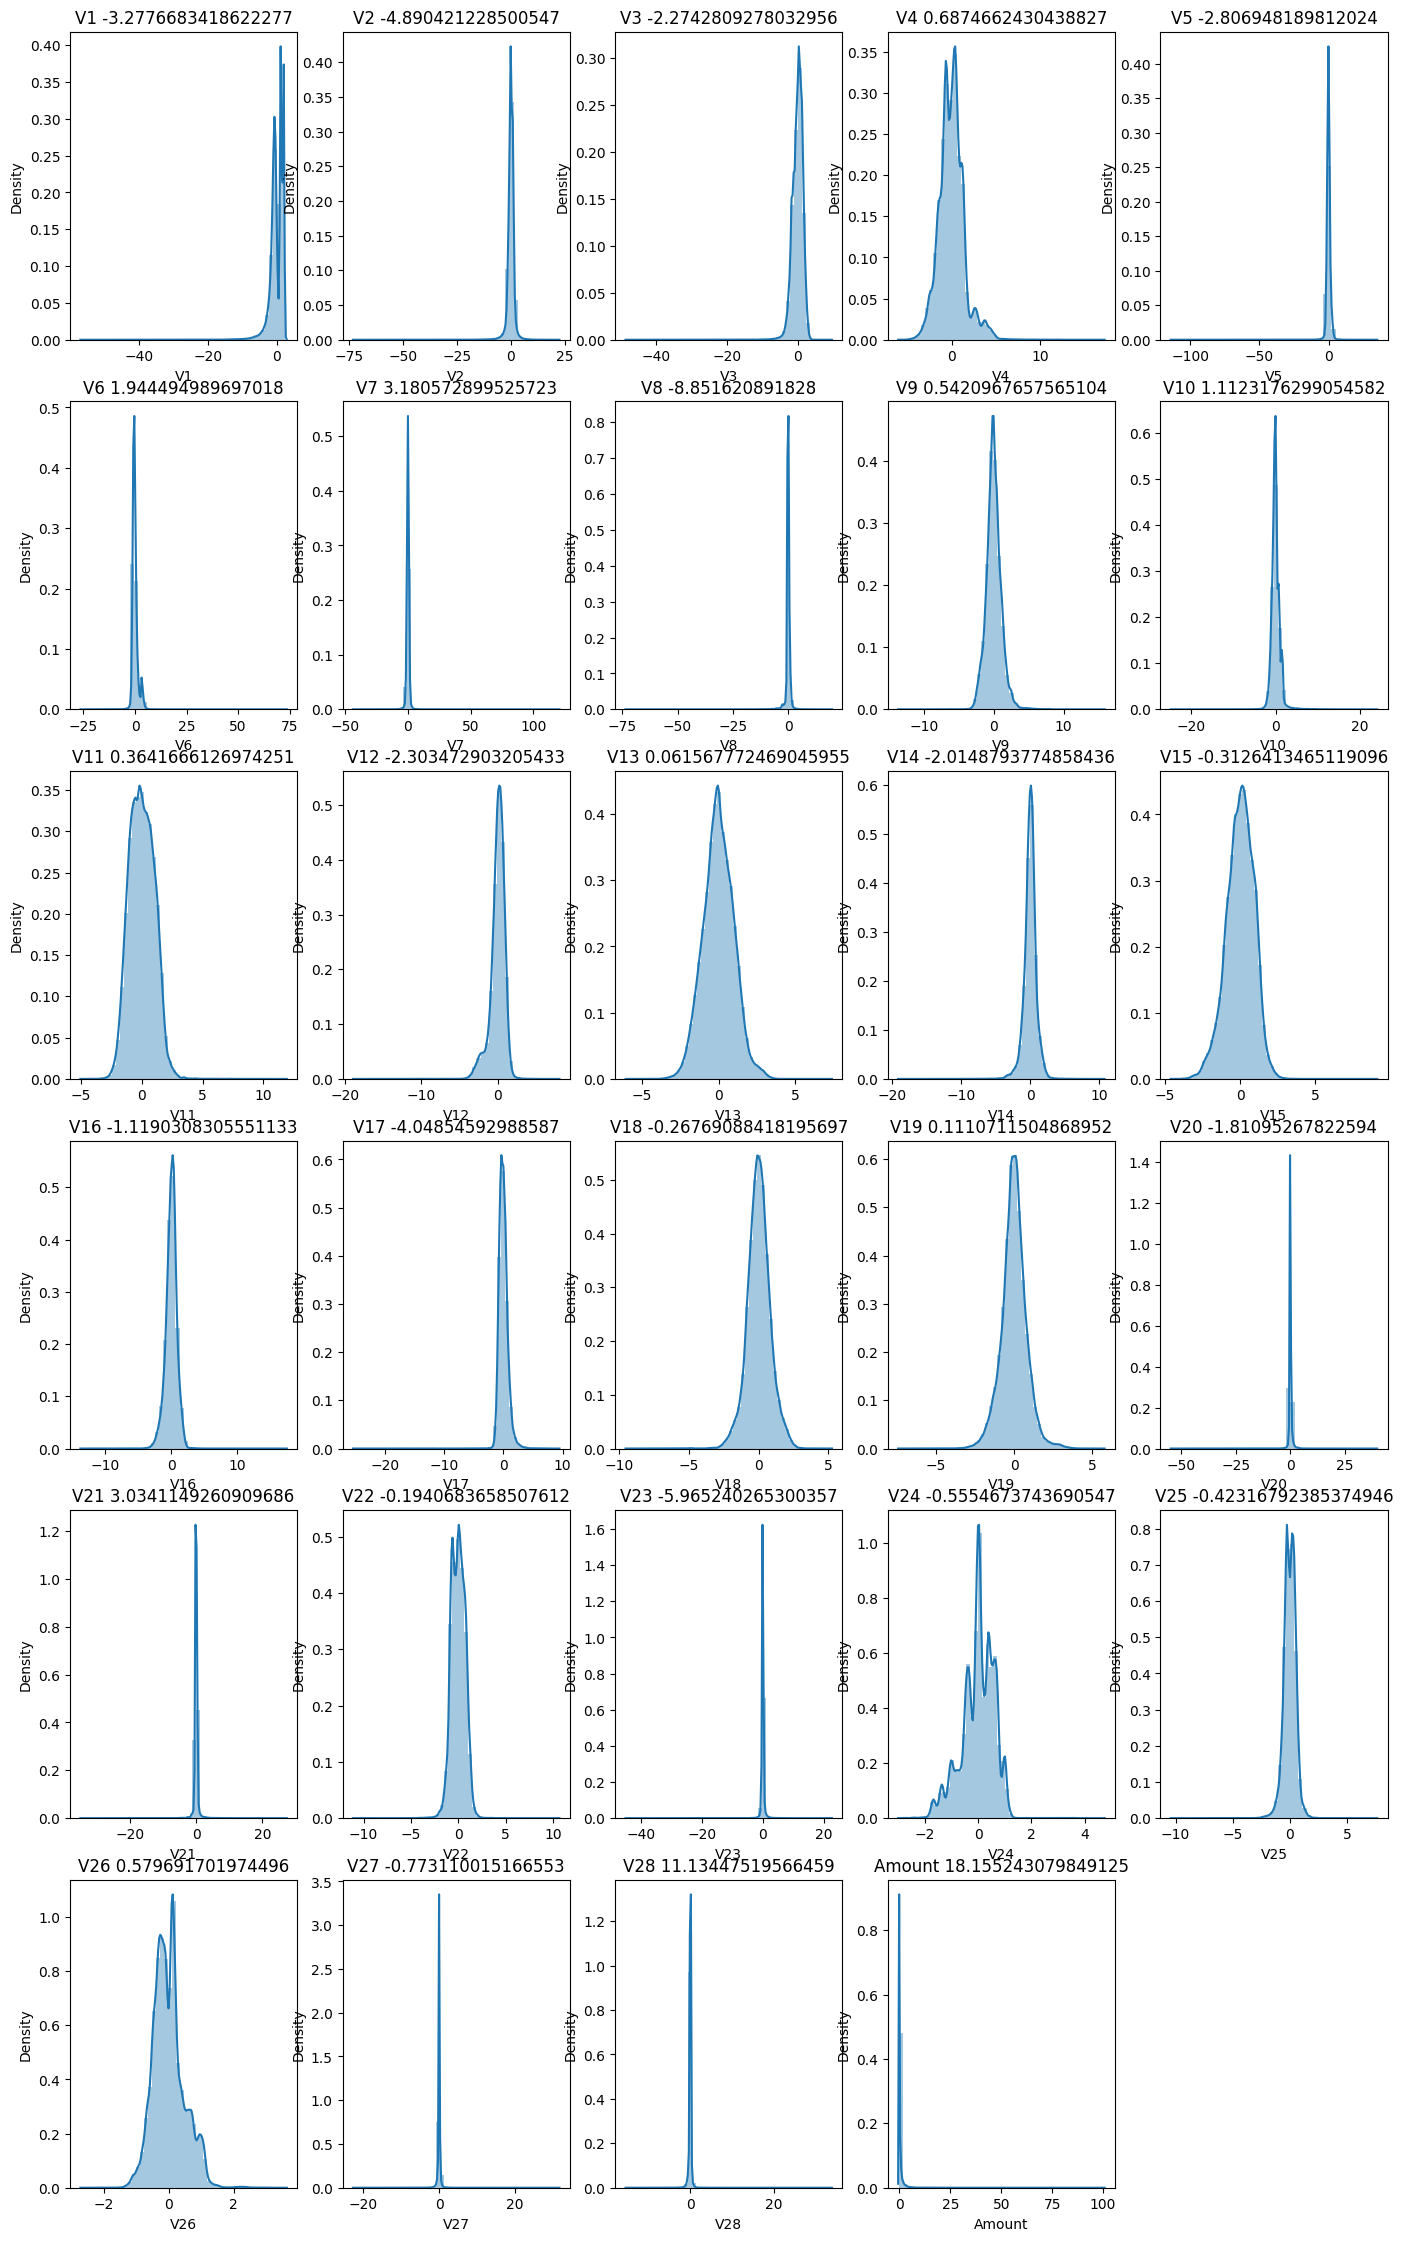

In [89]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

We see that there are many variables, which are heavily skewed. We will mitigate the skewness only for those variables for bringing them into normal distribution.

### Mitigate skewness with PowerTransformer

In [90]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [91]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

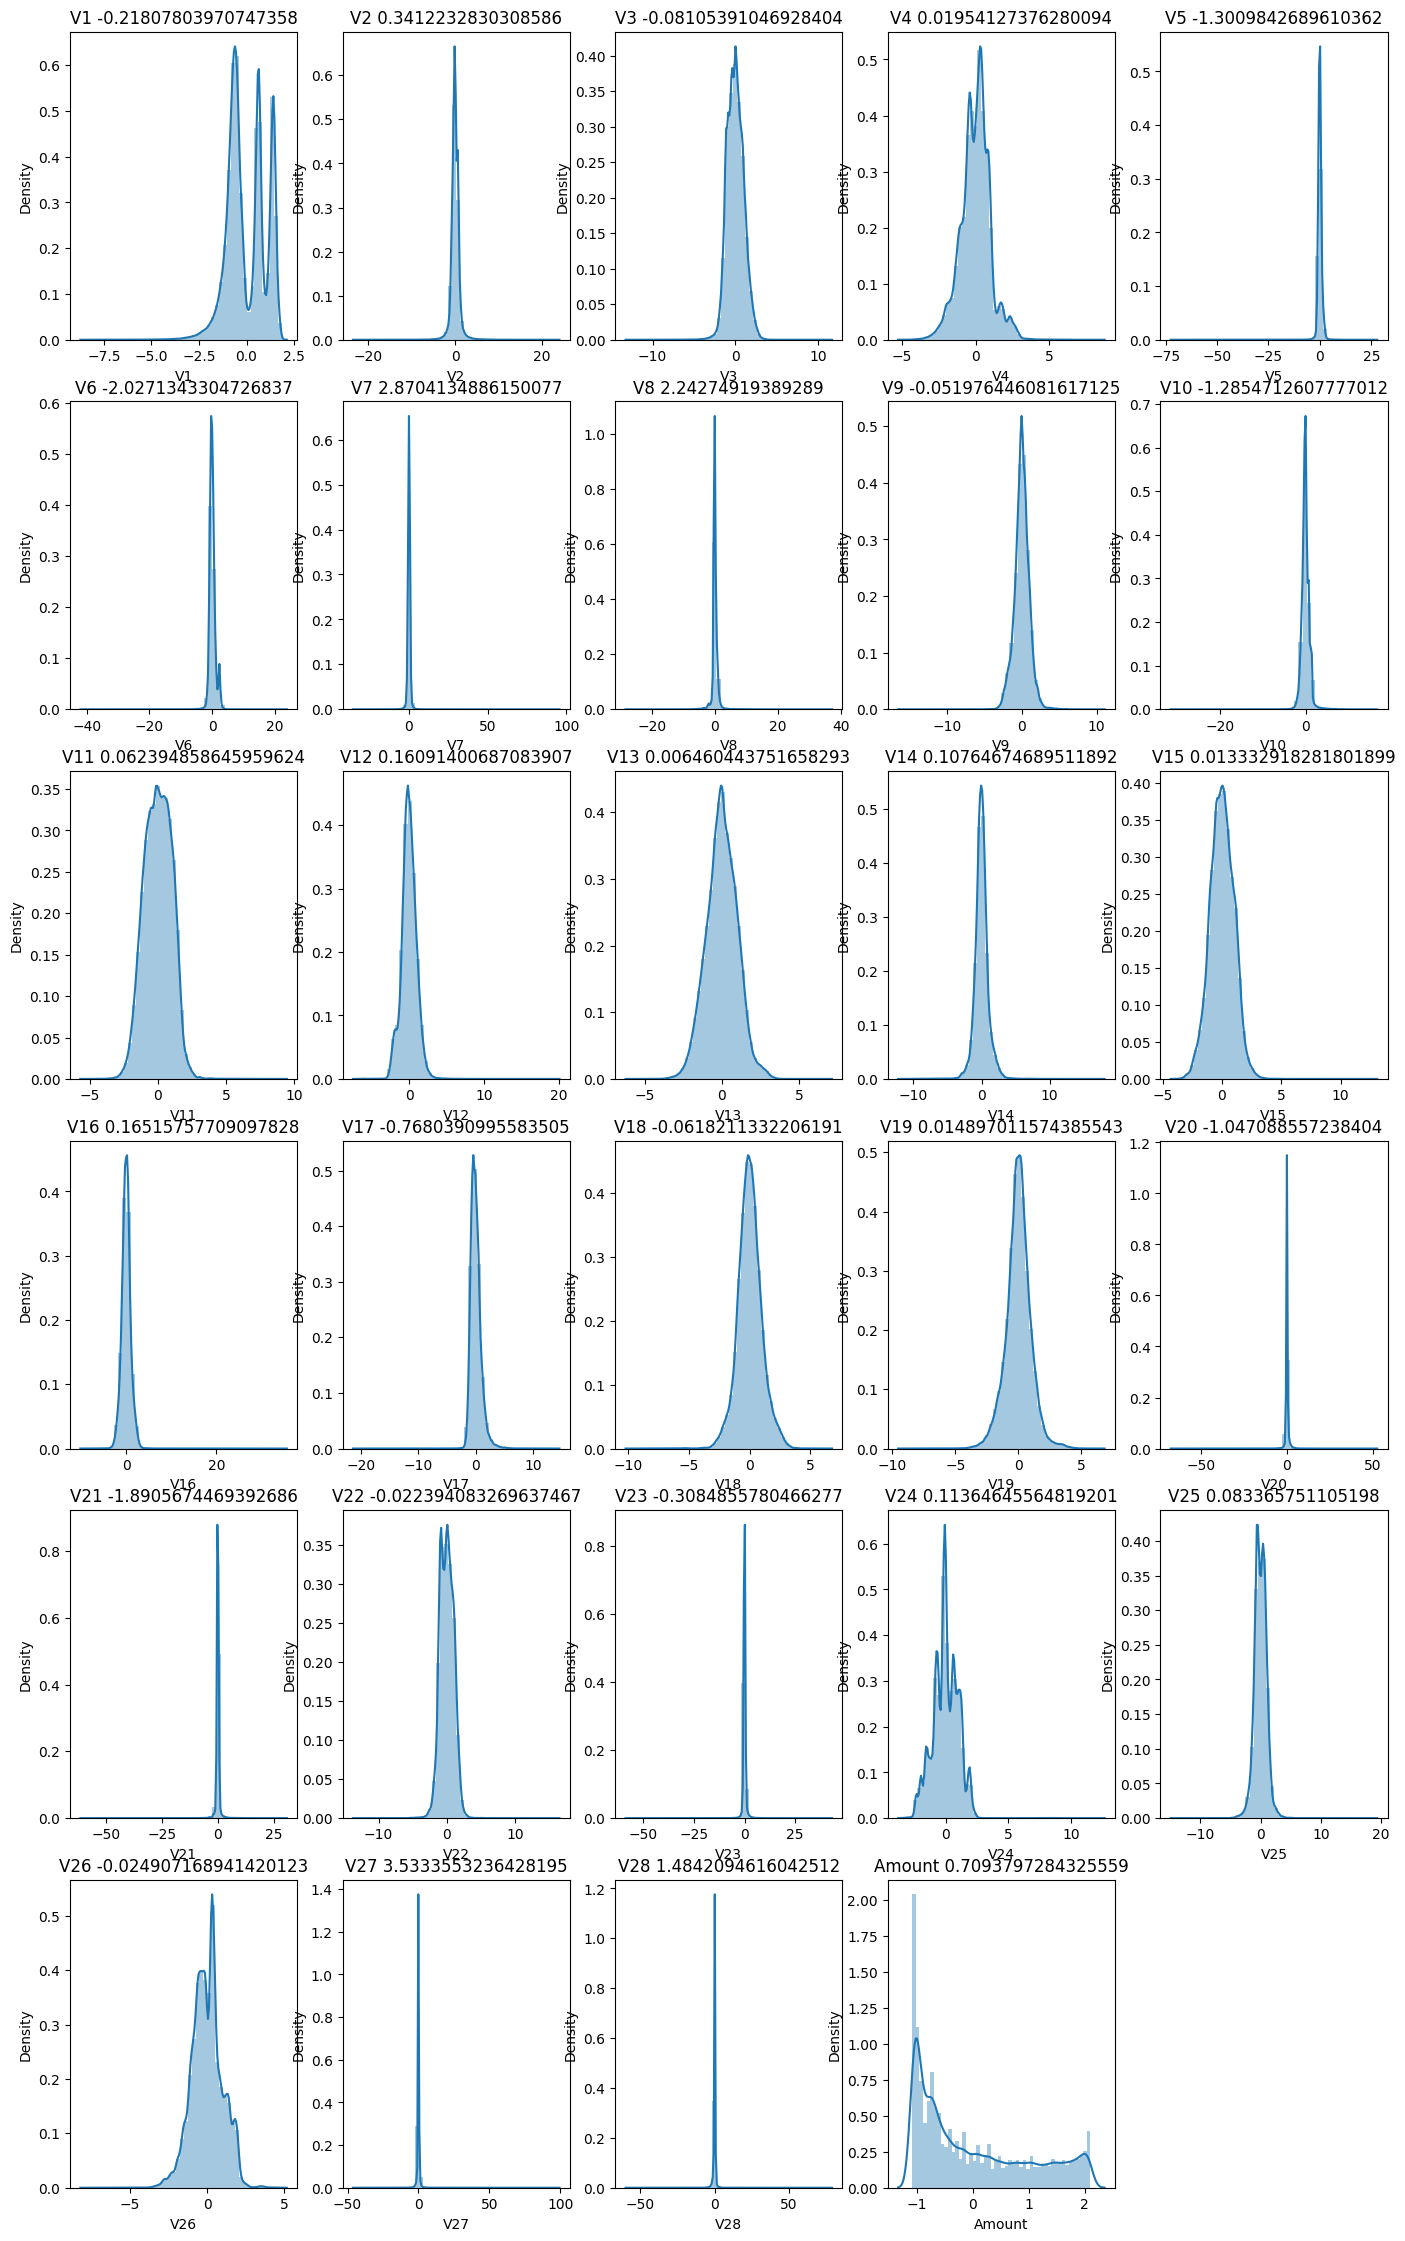

In [92]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

Now we can see that all the variables are normally distributed after the transformation.

# **Handling data imbalance**


As we see that the data is heavily imbalanced, We will try several approaches for handling data imbalance.

Undersampling :- Here for balancing the class distribution, the non-fraudulent transactions count will be reduced to 396 (similar count of fraudulent transactions)
Oversampling :- Here we will make the same count of non-fraudulent transactions as fraudulent transactions.
SMOTE :- Synthetic minority oversampling technique. It is another oversampling technique, which uses nearest neighbour algorithm to create synthetic data.
Adasyn:- This is similar to SMOTE with minor changes that the new synthetic data is generated on the region of low density of imbalanced data points.

## Undersampling

In [93]:
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [94]:
# instantiating the random undersampler
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [95]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_rus))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 396, 1: 396})


## Model building on balanced data with Undersampling

### Logistic Regression

In [96]:
# Import necessary libraries
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [97]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       0.009628      0.002356         0.005471        0.001194     0.01   
1       0.008695      0.001389         0.004511        0.000359     0.10   
2       0.008972      0.001368         0.004662        0.000394     1.00   
3       0.009003      0.000566         0.004397        0.000239    10.00   
4       0.009859      0.001713         0.004026        0.000195   100.00   
5       0.010483      0.001912         0.004105        0.000313  1000.00   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.986645           0.998575           0.975481   
1   {'C': 0.1}           0.985533           0.998259           0.975962   
2     {'C': 1}           0.982035           0.998417           0.975321   
3    {'C': 10}           0.975199           0.997151           0.975160   
4   {'C': 100}           0.972973           0.996993           0.973397   
5  {'C': 1000}           0.972655           0.996993           0.973077   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.980119           0.978405         0.983845        0.008225   
1           0.973545           0.978888         0.982437        0.008871   
2           0.964406           0.979371         0.979910        0.011034   
3           0.962001           0.980177         0.977938        0.011343   
4           0.962161           0.980177         0.977140        0.011481   
5           0.961680           0.980016         0.976884        0.011642   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.988856            0.985804   
1                2            0.990523            0.988280   
2                3            0.991083            0.988959   
3                4            0.992041            0.989368   
4                5            0.992061            0.989458   
5                6            0.992051            0.989488   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.991113            0.990018            0.990553   
1            0.993134            0.993014            0.992046   
2            0.993870            0.994238            0.992763   
3            0.994298            0.994477            0.993201   
4            0.994268            0.994716            0.993280   
5            0.994328            0.994646            0.993280   

   mean_train_score  std_train_score  
0          0.989269         0.001886  
1          0.991399         0.001818  
2          0.992182         0.001950  
3          0.992677         0.001870  
4          0.992757         0.001885  
5          0.992759         0.001871

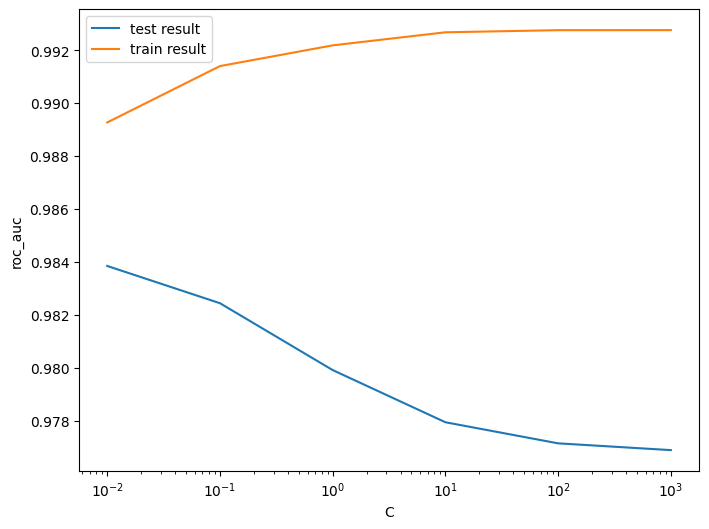

In [98]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [100]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9838449792159837 at C = 0.01


#### Logistic regression with optimal C

In [101]:
# Instantiate the model with best C
logistic_bal_rus = LogisticRegression(C=0.1)

In [102]:
# Fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(X_train_rus, y_train_rus)

##### Prediction on the train set

In [103]:
# Predictions on the train set
y_train_pred = logistic_bal_rus_model.predict(X_train_rus)

In [104]:
# Import necessary library
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[392   4]
 [ 31 365]]


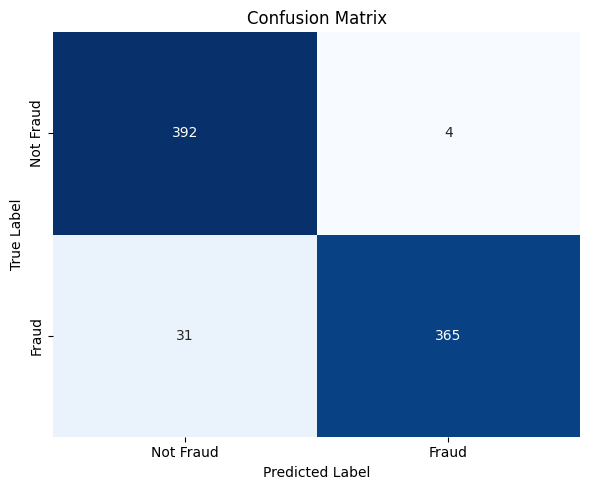

In [105]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [106]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [107]:
# Import necessary libraries
from sklearn import metrics
from sklearn.metrics import f1_score
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.9558080808080808
Sensitivity:- 0.9217171717171717
Specificity:- 0.98989898989899
F1-Score:- 0.954248366013072


In [108]:
# Import necessary library
from sklearn.metrics import classification_report
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       396
           1       0.99      0.92      0.95       396

    accuracy                           0.96       792
   macro avg       0.96      0.96      0.96       792
weighted avg       0.96      0.96      0.96       792



In [109]:
# Predicted probability
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [110]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

np.float64(0.9909129170492806)

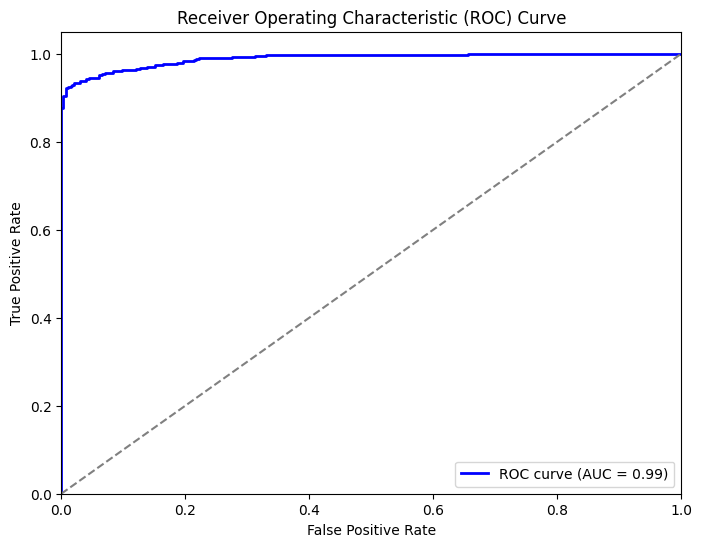

In [111]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define the draw_roc function
def draw_roc(y_true, y_pred_proba):
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)

    # Compute AUC score
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Ensure predicted probabilities exist
y_train_pred_proba = model_cv.best_estimator_.predict_proba(X_train_rus)[:, 1]

# Call the function to plot ROC curve
draw_roc(y_train_rus, y_train_pred_proba)


#### Prediction on the test set

In [112]:
# Prediction on the test set
y_test_pred = logistic_bal_rus_model.predict(X_test)

In [113]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55251  1615]
 [   11    85]]


In [114]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [115]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9714546539798462
Sensitivity:- 0.8854166666666666
Specificity:- 0.9715999015228783


In [116]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.05      0.89      0.09        96

    accuracy                           0.97     56962
   macro avg       0.52      0.93      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [117]:
# Predicted probability
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]

In [118]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

np.float64(0.9622784631121115)

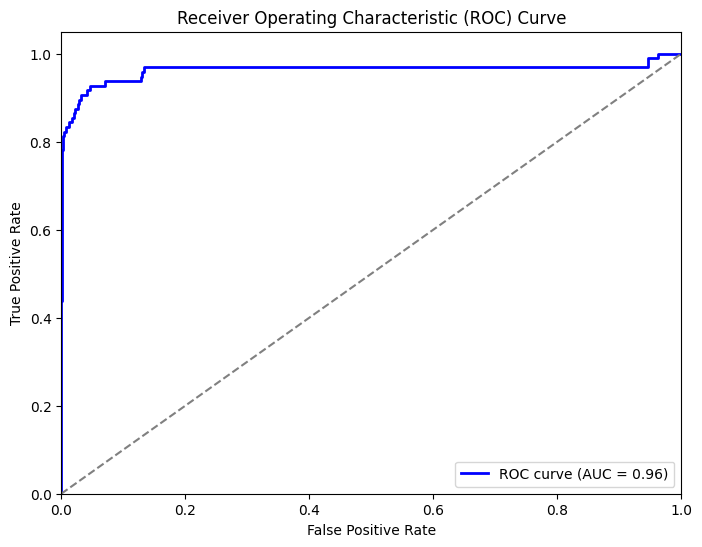

In [119]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.95
    - Sensitivity = 0.92
    - Specificity = 0.98
    - ROC = 0.99
- Test set
    - Accuracy = 0.97
    - Sensitivity = 0.88
    - Specificity = 0.97
    - ROC = 0.96

### XGBoost

In [120]:
# Import necessary library
from xgboost import XGBClassifier

# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_rus, y_train_rus)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [121]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.152662      0.051152         0.012829        0.001725   
1       0.132295      0.002304         0.012579        0.000644   
2       0.136405      0.003093         0.016594        0.007222   
3       0.090740      0.000705         0.012053        0.001059   
4       0.098362      0.005354         0.016586        0.006901   
5       0.100574      0.005874         0.011171        0.000160   

   param_learning_rate  param_subsample  \
0                  0.2              0.3   
1                  0.2              0.6   
2                  0.2              0.9   
3                  0.6              0.3   
4                  0.6              0.6   
5                  0.6              0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.967287   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.973772   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.973140   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.967229   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.966598   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.970500   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.980257           0.988464         0.978669        0.008718   
1           0.975895           0.982094         0.977254        0.003531   
2           0.976125           0.985652         0.978306        0.005336   
3           0.979167           0.980544         0.975647        0.005979   
4           0.976067           0.986169         0.976278        0.007991   
5           0.977961           0.981979         0.976814        0.004756   

   rank_test_score  split0_train_score  split1_train_score  \
0                1                 1.0            0.999957   
1                3                 1.0            1.000000   
2                2                 1.0            1.000000   
3                6                 1.0            1.000000   
4                5                 1.0            1.000000   
5                4                 1.0            1.000000   

   split2_train_score  mean_train_score  std_train_score  
0                 1.0          0.999986          0.00002  
1                 1.0          1.000000          0.00000  
2                 1.0          1.000000          0.00000  
3                 1.0          1.000000          0.00000  
4                 1.0          1.000000          0.00000  
5                 1.0          1.000000          0.00000

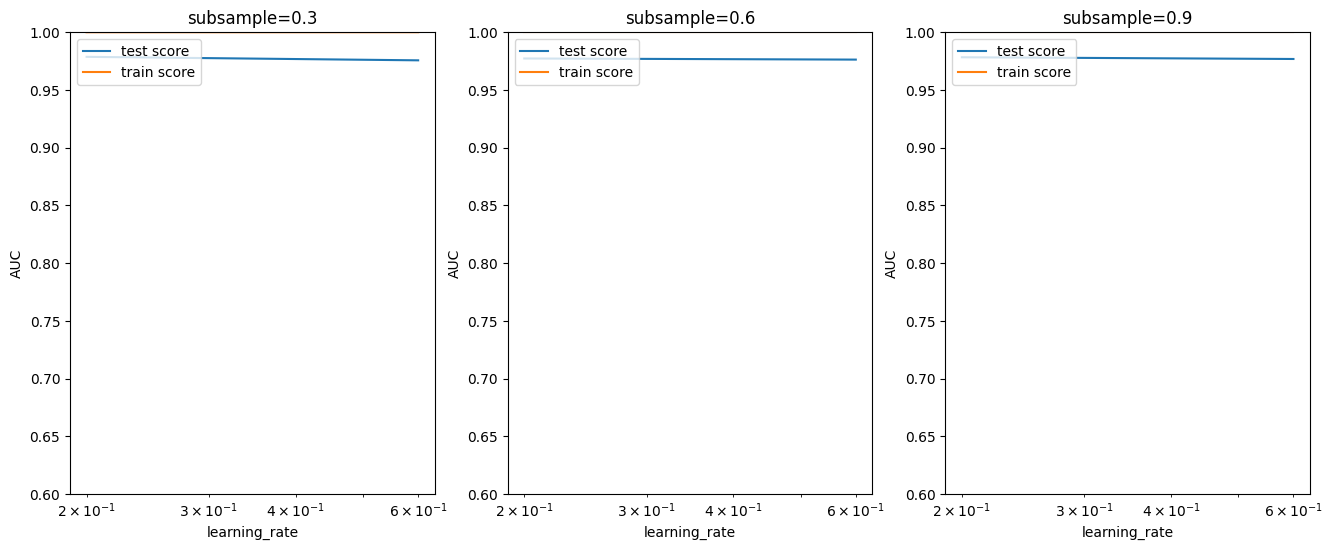

In [122]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [123]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

In [124]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_rus_model = XGBClassifier(params = params)
xgb_bal_rus_model.fit(X_train_rus, y_train_rus)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

##### Prediction on the train set

In [125]:
# Predictions on the train set
y_train_pred = xgb_bal_rus_model.predict(X_train_rus)

In [126]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_rus)
print(confusion)

[[396   0]
 [  0 396]]


In [127]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [128]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [129]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       396
           1       1.00      1.00      1.00       396

    accuracy                           1.00       792
   macro avg       1.00      1.00      1.00       792
weighted avg       1.00      1.00      1.00       792



In [130]:
# Predicted probability
y_train_pred_proba = xgb_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [131]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

np.float64(1.0)

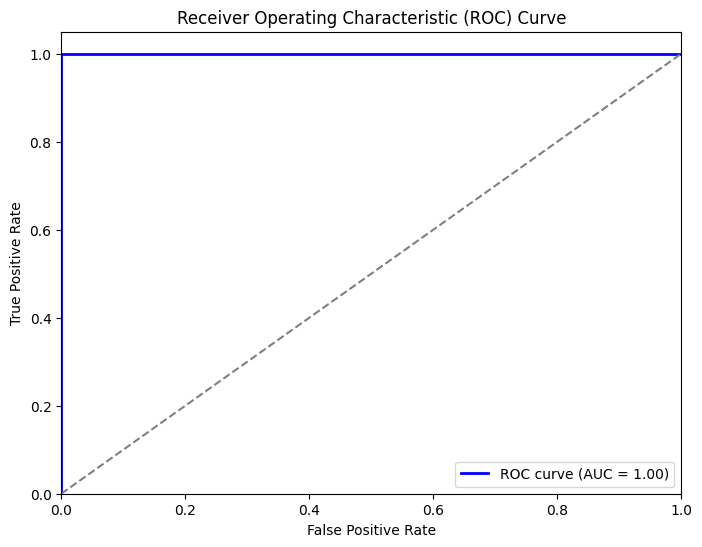

In [132]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  # Ensure auc is imported from sklearn.metrics

# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

##### Prediction on the test set

In [133]:
# Predictions on the test set
y_test_pred = xgb_bal_rus_model.predict(X_test)

In [134]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[54475  2391]
 [    8    88]]


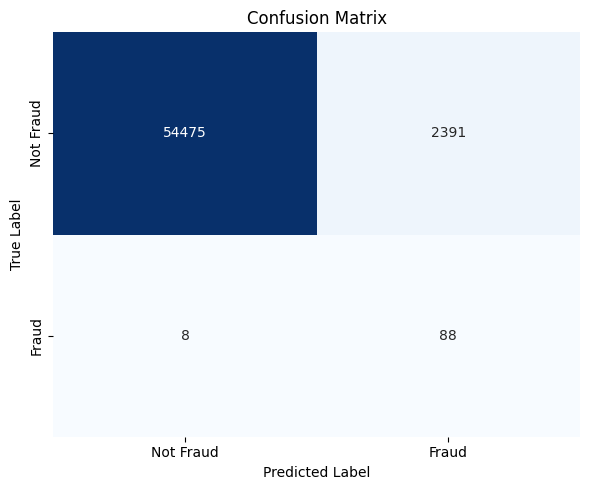

In [135]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [136]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [137]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9578842035040904
Sensitivity:- 0.9166666666666666
Specificity:- 0.9579537860936236


In [138]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56866
           1       0.04      0.92      0.07        96

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.52     56962
weighted avg       1.00      0.96      0.98     56962



In [142]:
# Predicted probability
y_test_pred_proba = xgb_bal_rus_model.predict_proba(X_test)[:,1]

In [143]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

np.float64(0.9779980751532844)

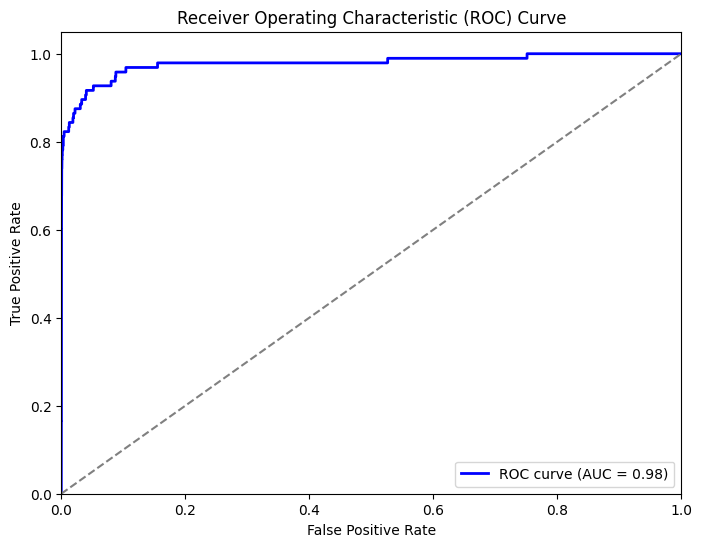

In [144]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  # Ensure auc is imported from sklearn.metrics

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 1.0
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.96
    - Sensitivity = 0.92
    - Specificity = 0.96
    - ROC-AUC = 0.98

### Decision Tree

In [145]:
# Import the necessary class
from sklearn.tree import DecisionTreeClassifier

# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_rus,y_train_rus)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [146]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.013696      0.001362         0.007555        0.001840   
1       0.013022      0.000446         0.006454        0.000660   
2       0.011118      0.000591         0.006180        0.000031   
3       0.011288      0.000505         0.007854        0.001992   
4       0.013261      0.000468         0.006303        0.000082   
5       0.013387      0.000418         0.007690        0.001678   
6       0.012678      0.002247         0.008135        0.002207   
7       0.011054      0.000098         0.006898        0.000353   

   param_max_depth  param_min_samples_leaf  param_min_samples_split  \
0                5                      50                       50   
1                5                      50                      100   
2                5                     100                       50   
3                5                     100                      100   
4               10                      50                       50   
5               10                      50                      100   
6               10                     100                       50   
7               10                     100                      100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.963900   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.963556   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.947056   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.943670   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.963929   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.963585   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.946970   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.947056   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.966368           0.975580         0.968616        0.005026   
1           0.960457           0.972796         0.965603        0.005241   
2           0.953885           0.962609         0.954517        0.006365   
3           0.950700           0.963212         0.952527        0.008082   
4           0.960342           0.975752         0.966674        0.006584   
5           0.963126           0.968090         0.964933        0.002240   
6           0.954029           0.961920         0.954306        0.006107   
7           0.953885           0.962351         0.954431        0.006256   

   rank_test_score  
0                1  
1                3  
2                5  
3                8  
4                2  
5                4  
6                7  
7                6

In [147]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.968616085093358
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)


In [148]:
# Model with optimal hyperparameters
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=5,
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_rus_model.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [149]:
# Predictions on the train set
y_train_pred = dt_bal_rus_model.predict(X_train_rus)

In [150]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[389   7]
 [ 47 349]]


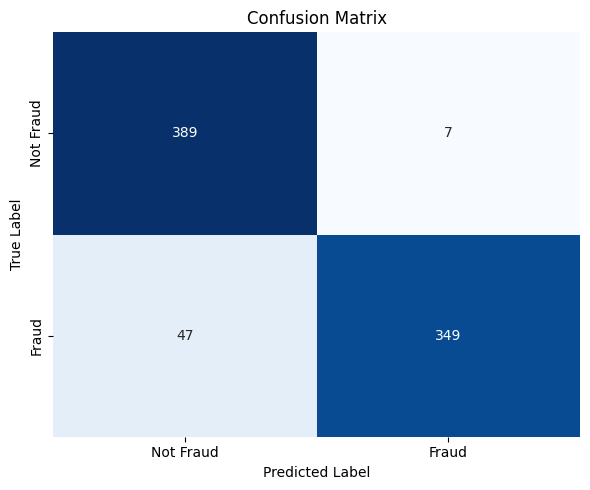

In [151]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [152]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [153]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9318181818181818
Sensitivity:- 0.8813131313131313
Specificity:- 0.9823232323232324


In [154]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       396
           1       0.98      0.88      0.93       396

    accuracy                           0.93       792
   macro avg       0.94      0.93      0.93       792
weighted avg       0.94      0.93      0.93       792



In [155]:
# Predicted probability
y_train_pred_proba = dt_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [156]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

np.float64(0.9814559738802163)

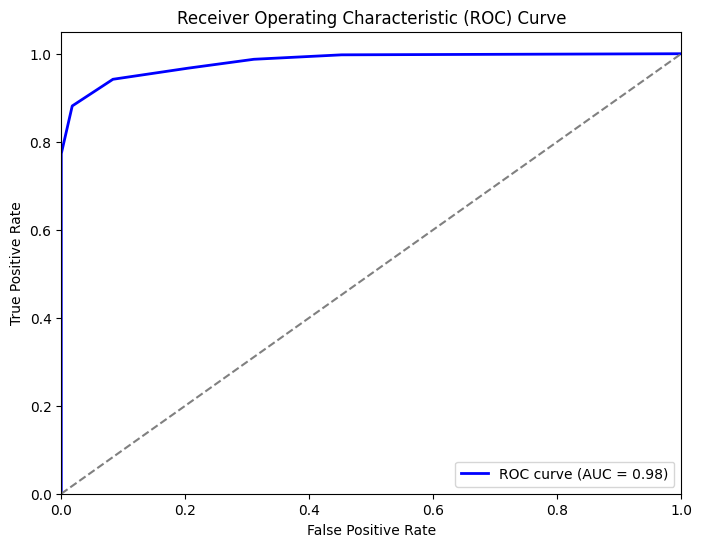

In [157]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  # Ensure auc is from sklearn.metrics

# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

##### Prediction on the test set

In [158]:
# Predictions on the test set
y_test_pred = dt_bal_rus_model.predict(X_test)

In [159]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55163  1703]
 [   16    80]]


In [160]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [161]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9698219865875496
Sensitivity:- 0.8333333333333334
Specificity:- 0.9700524038968804


In [162]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56866
           1       0.04      0.83      0.09        96

    accuracy                           0.97     56962
   macro avg       0.52      0.90      0.53     56962
weighted avg       1.00      0.97      0.98     56962



In [163]:
# Predicted probability
y_test_pred_proba = dt_bal_rus_model.predict_proba(X_test)[:,1]

In [164]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

np.float64(0.9674007022356652)

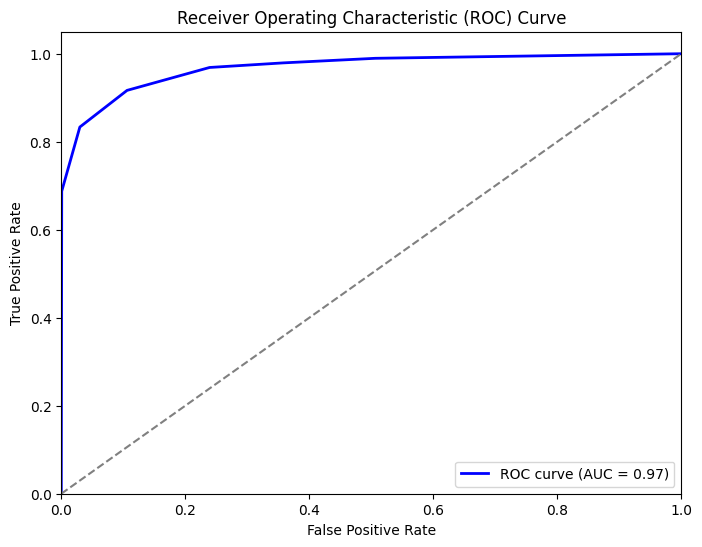

In [165]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  # Ensure auc is from sklearn.metrics

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.93
    - Sensitivity = 0.88
    - Specificity = 0.98
    - ROC-AUC = 0.98
- Test set
    - Accuracy = 0.97
    - Sensitivity = 0.83
    - Specificity = 0.97
    - ROC-AUC = 0.97

### Random forest

In [166]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300],
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1,
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_rus, y_train_rus)


Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [167]:
# printing the optimal accuracy score and hyperparameters
print('We can get roc-auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get roc-auc of 0.9789052137536985 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}


In [168]:
# model with the best hyperparameters

rfc_bal_rus_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50,
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=200)

In [169]:
# Fit the model
rfc_bal_rus_model.fit(X_train_rus, y_train_rus)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=200)

##### Prediction on the train set

In [170]:
# Predictions on the train set
y_train_pred = rfc_bal_rus_model.predict(X_train_rus)

In [171]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[394   2]
 [ 43 353]]


In [172]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [173]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.9431818181818182
Sensitivity:- 0.8914141414141414
Specificity:- 0.9949494949494949
F1-Score:- 0.9400798934753661


In [174]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       396
           1       0.99      0.89      0.94       396

    accuracy                           0.94       792
   macro avg       0.95      0.94      0.94       792
weighted avg       0.95      0.94      0.94       792



In [175]:
# Predicted probability
y_train_pred_proba = rfc_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [176]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

np.float64(0.9868317008468523)

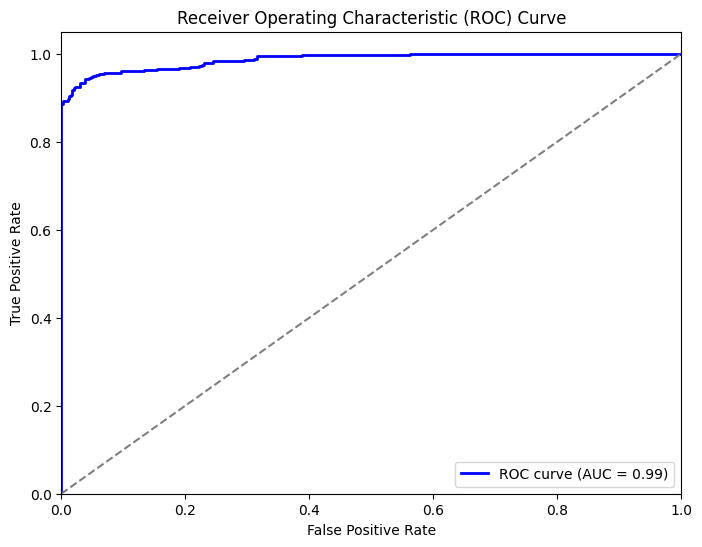

In [177]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  # Ensure auc is imported from sklearn.metrics
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

##### Prediction on the test set

In [178]:
# Predictions on the test set
y_test_pred = rfc_bal_rus_model.predict(X_test)

In [179]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55720  1146]
 [   17    79]]


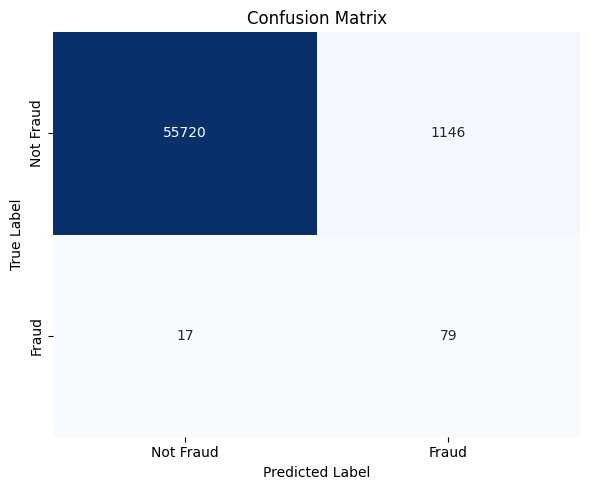

In [180]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [181]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [182]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9795828798146132
Sensitivity:- 0.8229166666666666
Specificity:- 0.9798473604614356


In [183]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.82      0.12        96

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [184]:
# Predicted probability
y_test_pred_proba = rfc_bal_rus_model.predict_proba(X_test)[:,1]

In [185]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

np.float64(0.9745408430931195)

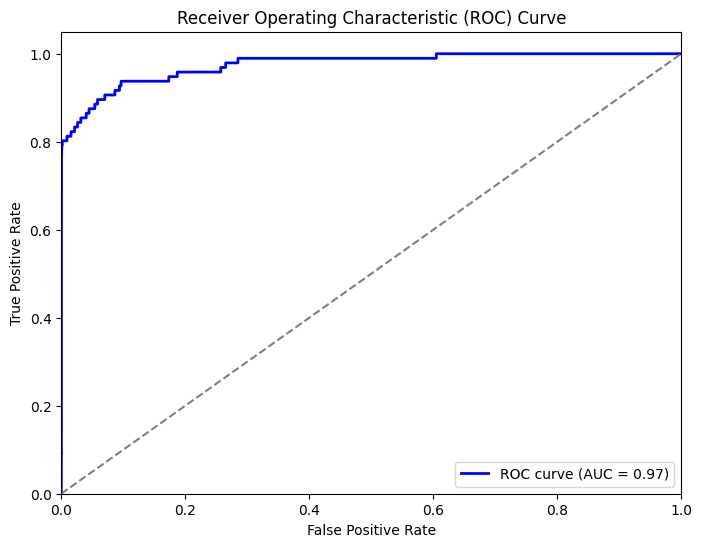

In [186]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  # Ensure auc is imported from sklearn.metrics
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.94
    - Sensitivity = 0.89
    - Specificity = 0.99
    - ROC-AUC = 0.99
- Test set
    - Accuracy = 0.98
    - Sensitivity = 0.82
    - Specificity = 0.98
    - ROC-AUC = 0.97

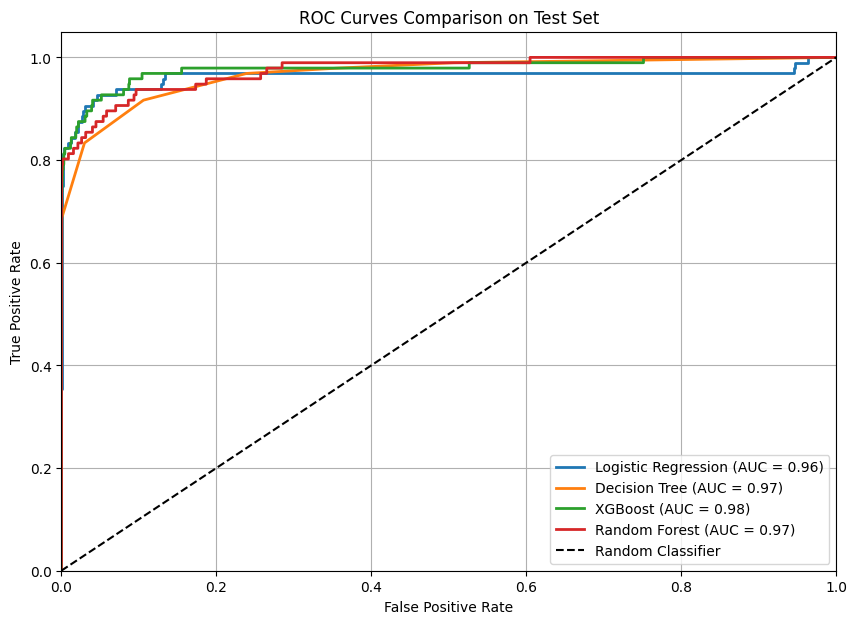

In [187]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for each model on the test set
y_test_pred_proba_logreg = logistic_bal_rus_model.predict_proba(X_test)[:, 1]
y_test_pred_proba_dt = dt_bal_rus_model.predict_proba(X_test)[:, 1]
y_test_pred_proba_xgb = xgb_bal_rus_model.predict_proba(X_test)[:, 1]
y_test_pred_proba_rf = rfc_bal_rus_model.predict_proba(X_test)[:, 1]

# Compute FPR, TPR, and AUC for each
fpr_log, tpr_log, _ = roc_curve(y_test, y_test_pred_proba_logreg)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_pred_proba_dt)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_test_pred_proba_xgb)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_pred_proba_rf)

auc_log = auc(fpr_log, tpr_log)
auc_dt = auc(fpr_dt, tpr_dt)
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot all ROC curves together
plt.figure(figsize=(10, 7))

plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})', linewidth=2)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', linewidth=2)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linewidth=2)

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Formatting the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison on Test Set')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Oversampling

In [188]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

In [189]:
# instantiating the random oversampler
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [190]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227449})


### Logistic Regression

In [191]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [192]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       1.642188      0.288057         0.052447        0.020617     0.01   
1       1.694710      0.445758         0.046523        0.008313     0.10   
2       1.500070      0.120596         0.043598        0.002107     1.00   
3       1.709468      0.416855         0.050705        0.018879    10.00   
4       1.723972      0.459671         0.056200        0.016068   100.00   
5       1.504807      0.140644         0.048299        0.006713  1000.00   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.988511           0.988348           0.988646   
1   {'C': 0.1}           0.988505           0.988374           0.988679   
2     {'C': 1}           0.988505           0.988367           0.988680   
3    {'C': 10}           0.988504           0.988386           0.988679   
4   {'C': 100}           0.988504           0.988386           0.988680   
5  {'C': 1000}           0.988504           0.988386           0.988680   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.988467           0.988931         0.988581        0.000199   
1           0.988461           0.988949         0.988594        0.000204   
2           0.988458           0.988952         0.988592        0.000206   
3           0.988458           0.988951         0.988596        0.000203   
4           0.988458           0.988951         0.988596        0.000203   
5           0.988458           0.988952         0.988596        0.000203   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.988598            0.988595   
1                4            0.988608            0.988606   
2                5            0.988610            0.988598   
3                3            0.988610            0.988614   
4                2            0.988610            0.988614   
5                1            0.988610            0.988614   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.988618            0.988661            0.988520   
1            0.988627            0.988675            0.988533   
2            0.988631            0.988675            0.988534   
3            0.988629            0.988674            0.988534   
4            0.988629            0.988674            0.988534   
5            0.988629            0.988674            0.988534   

   mean_train_score  std_train_score  
0          0.988598         0.000046  
1          0.988610         0.000046  
2          0.988610         0.000046  
3          0.988612         0.000045  
4          0.988612         0.000045  
5          0.988612         0.000045

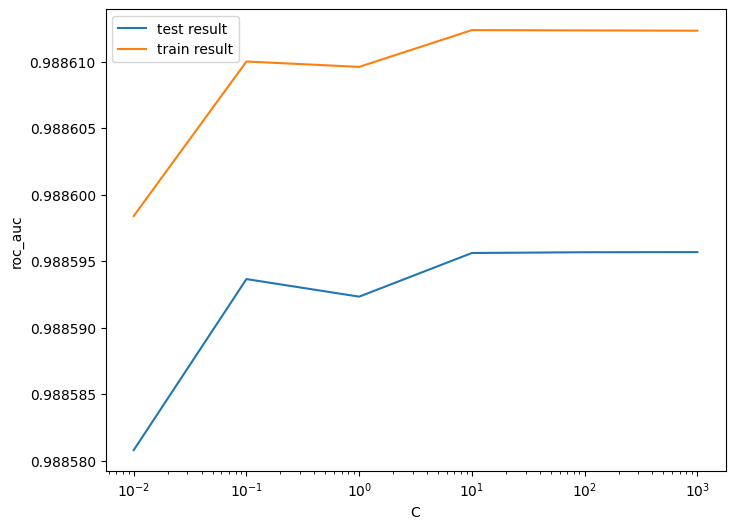

In [193]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [194]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9885956692511909 at C = 1000


#### Logistic regression with optimal C

In [195]:
# Instantiate the model with best C
logistic_bal_ros = LogisticRegression(C=0.1)

In [196]:
# Fit the model on the train set
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, y_train_ros)

##### Prediction on the train set

In [197]:
# Predictions on the train set
y_train_pred = logistic_bal_ros_model.predict(X_train_ros)

In [198]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[222291   5158]
 [ 17633 209816]]


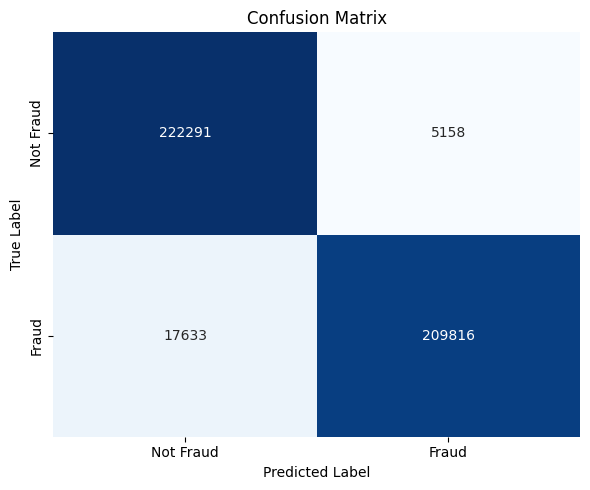

In [199]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [200]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [201]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

Accuracy:- 0.9498986586003896
Sensitivity:- 0.9224749284454977
Specificity:- 0.9773223887552814
F1-Score:- 0.9484859512276712


In [202]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [203]:
# Predicted probability
y_train_pred_proba = logistic_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [204]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

np.float64(0.9886051875476866)

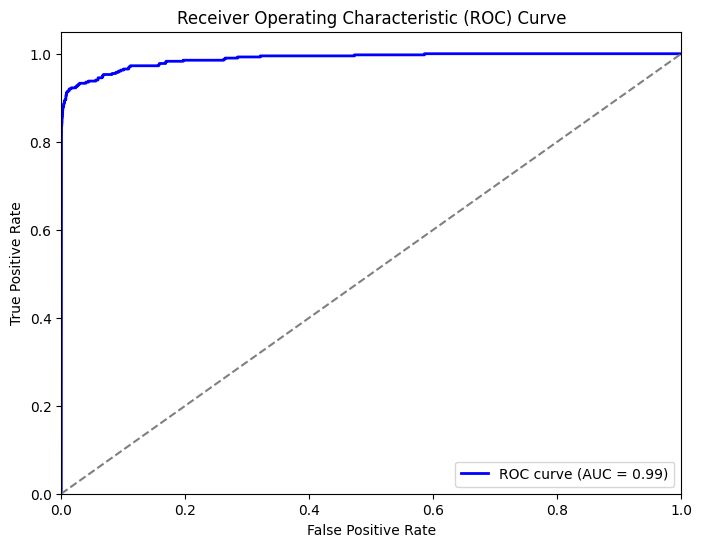

In [205]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  # Ensure auc is imported from sklearn.metrics

# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

#### Prediction on the test set

In [206]:
# Prediction on the test set
y_test_pred = logistic_bal_ros_model.predict(X_test)

In [207]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55550  1316]
 [   11    85]]


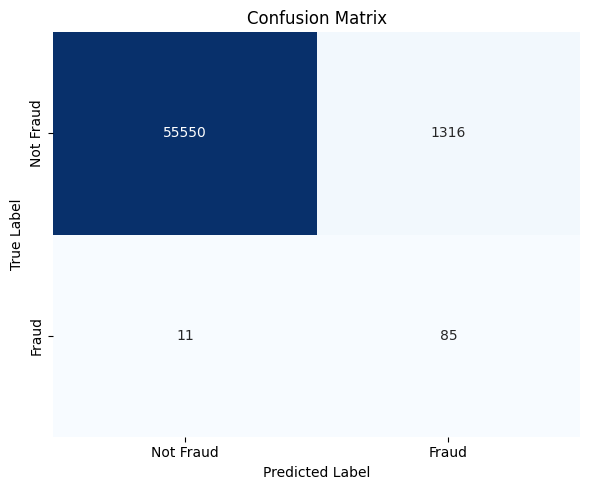

In [209]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [208]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [210]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9767037674238966
Sensitivity:- 0.8854166666666666
Specificity:- 0.9768578764112124


In [211]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [212]:
# Predicted probability
y_test_pred_proba = logistic_bal_ros_model.predict_proba(X_test)[:,1]

In [213]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

np.float64(0.9717822563863587)

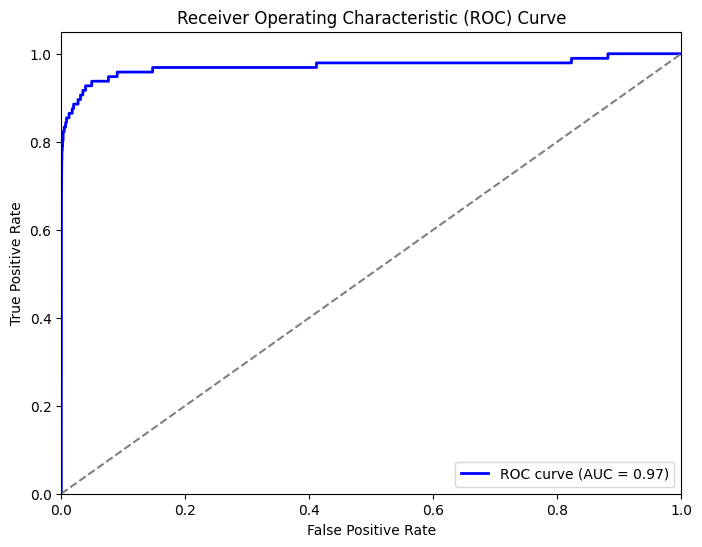

In [214]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  # Ensure auc is imported from sklearn.metrics

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.95
    - Sensitivity = 0.92
    - Specificity = 0.97
    - ROC = 0.99
- Test set
    - Accuracy = 0.97
    - Sensitivity = 0.89
    - Specificity = 0.97
    - ROC = 0.97

### XGBoost

In [215]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [216]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.477001      0.869954         0.239962        0.001856   
1       7.139826      0.634740         0.285184        0.059981   
2       7.205522      0.767031         0.248444        0.005962   
3       8.072194      1.420212         0.249738        0.008575   
4       7.586915      0.862711         0.242081        0.001584   
5       7.377767      0.834280         0.247843        0.008416   

   param_learning_rate  param_subsample  \
0                  0.2              0.3   
1                  0.2              0.6   
2                  0.2              0.9   
3                  0.6              0.3   
4                  0.6              0.6   
5                  0.6              0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.999917   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.999900   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.999917   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.999982   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.999990   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.999984   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999912           0.999896         0.999908        0.000009   
1           0.999907           0.999908         0.999905        0.000003   
2           0.999904           0.999894         0.999905        0.000009   
3           0.999986           0.999974         0.999981        0.000005   
4           0.999989           0.999978         0.999986        0.000005   
5           0.999982           0.999965         0.999977        0.000009   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.999927            0.999919   
1                5            0.999913            0.999917   
2                6            0.999923            0.999904   
3                2            0.999997            0.999997   
4                1            0.999999            0.999998   
5                3            0.999996            0.999997   

   split2_train_score  mean_train_score  std_train_score  
0            0.999917          0.999921     4.466664e-06  
1            0.999925          0.999918     4.927668e-06  
2            0.999911          0.999913     7.668671e-06  
3            0.999999          0.999998     8.870884e-07  
4            0.999999          0.999999     5.316008e-07  
5            0.999997          0.999997     3.801151e-07

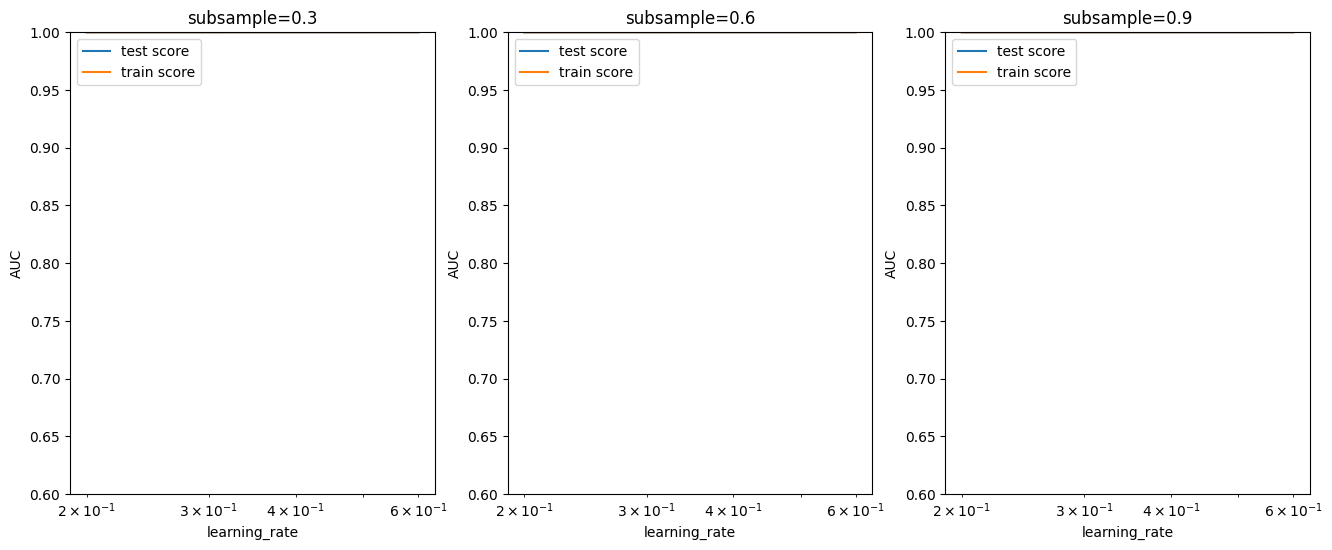

In [217]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [218]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [219]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

##### Prediction on the train set

In [220]:
# Predictions on the train set
y_train_pred = xgb_bal_ros_model.predict(X_train_ros)

In [221]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_ros)
print(confusion)

[[227449      0]
 [     0 227449]]


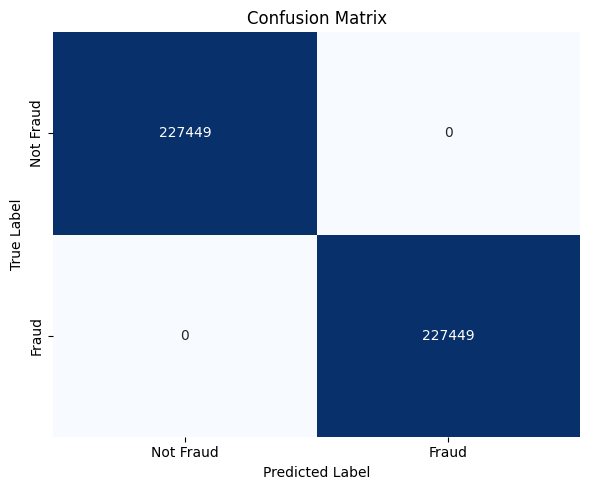

In [222]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [223]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [224]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [225]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [226]:
# Predicted probability
y_train_pred_proba = xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [227]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

np.float64(1.0)

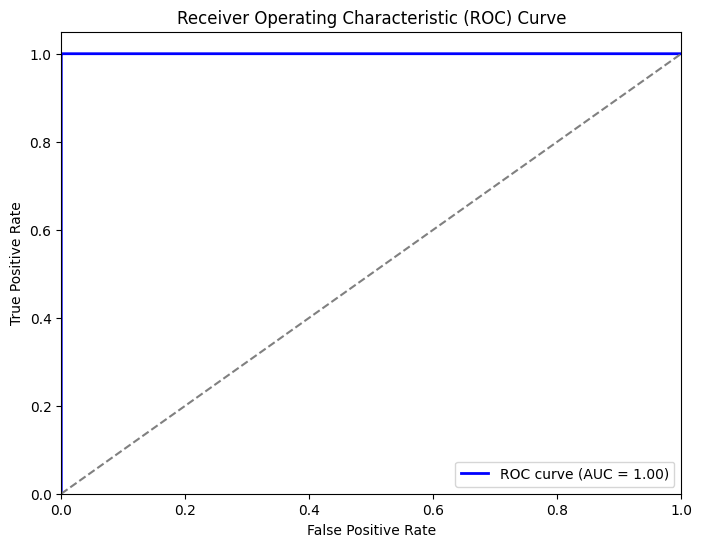

In [228]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  # Ensure auc is imported from sklearn.metrics

# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

##### Prediction on the test set

In [229]:
# Predictions on the test set
y_test_pred = xgb_bal_ros_model.predict(X_test)

In [230]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56855    11]
 [   22    74]]


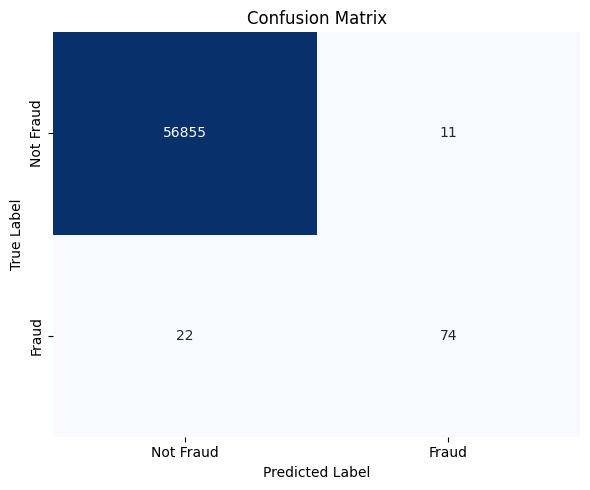

In [231]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [232]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [233]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.999420666409185
Sensitivity:- 0.7708333333333334
Specificity:- 0.9998065627967503


In [234]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.87      0.77      0.82        96

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [235]:
# Predicted probability
y_test_pred_proba = xgb_bal_ros_model.predict_proba(X_test)[:,1]

In [236]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

np.float64(0.9668097662340708)

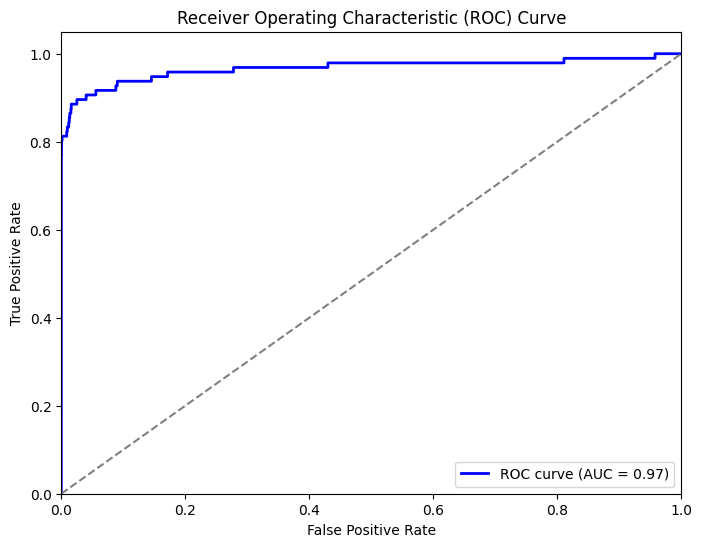

In [237]:
# Re-import auc from sklearn.metrics to ensure correct function is used
from sklearn.metrics import auc, roc_curve

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 1.0
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.77
    - Specificity = 0.99
    - ROC-AUC = 0.97

### Decision Tree

In [238]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [239]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       6.598806      0.171571         0.051014        0.006459   
1       6.444660      0.287256         0.041597        0.001724   
2       6.720842      0.282256         0.042307        0.001400   
3       6.484461      0.456372         0.044919        0.001879   
4      10.453175      0.142210         0.043172        0.001506   
5      10.144304      0.297003         0.048555        0.009996   
6      10.127188      0.206737         0.045269        0.003269   
7       9.891800      0.323448         0.045385        0.005953   

   param_max_depth  param_min_samples_leaf  param_min_samples_split  \
0                5                      50                       50   
1                5                      50                      100   
2                5                     100                       50   
3                5                     100                      100   
4               10                      50                       50   
5               10                      50                      100   
6               10                     100                       50   
7               10                     100                      100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.990573   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.990573   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.990555   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.990562   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.999552   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.999570   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.999590   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.999587   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.990456           0.991052         0.990693        0.000258   
1           0.990456           0.991027         0.990685        0.000246   
2           0.990377           0.990786         0.990573        0.000168   
3           0.990387           0.990786         0.990579        0.000163   
4           0.999638           0.999635         0.999608        0.000040   
5           0.999632           0.999570         0.999591        0.000029   
6           0.999615           0.999471         0.999559        0.000063   
7           0.999616           0.999519         0.999574        0.000041   

   rank_test_score  
0                5  
1                6  
2                8  
3                7  
4                1  
5                2  
6                4  
7                3

In [240]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9996080273654467
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [241]:
# Model with optimal hyperparameters
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [242]:
# Predictions on the train set
y_train_pred = dt_bal_ros_model.predict(X_train_ros)

In [243]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[225914   1535]
 [     0 227449]]


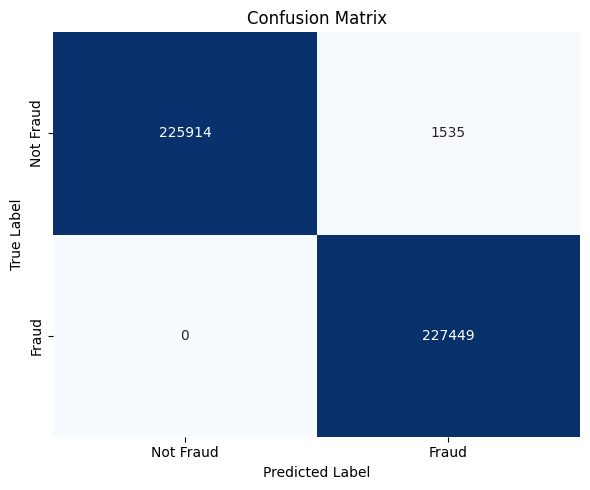

In [245]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [244]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [246]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9966256171713219
Sensitivity:- 1.0
Specificity:- 0.9932512343426438


In [247]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227449
           1       0.99      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [248]:
# Predicted probability
y_train_pred_proba = dt_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [249]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

np.float64(0.9997649631606129)

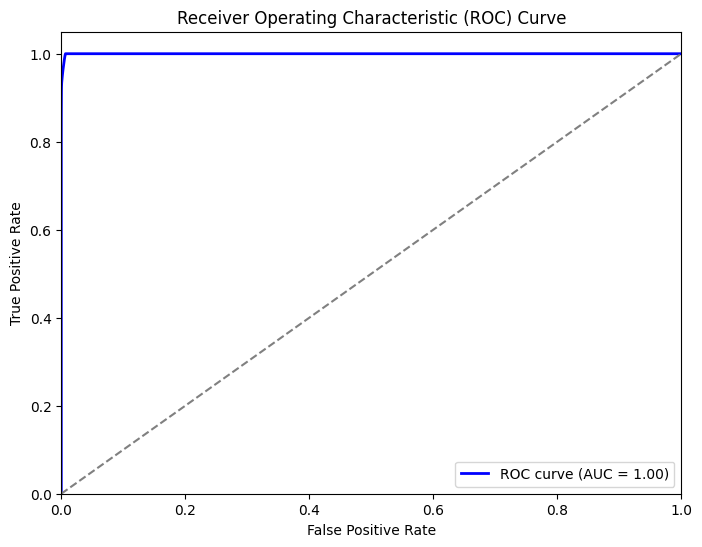

In [250]:
# Re-import auc from sklearn.metrics to ensure correct function is used
from sklearn.metrics import auc, roc_curve

# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

##### Prediction on the test set

In [251]:
# Predictions on the test set
y_test_pred = dt_bal_ros_model.predict(X_test)

In [252]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56431   435]
 [   20    76]]


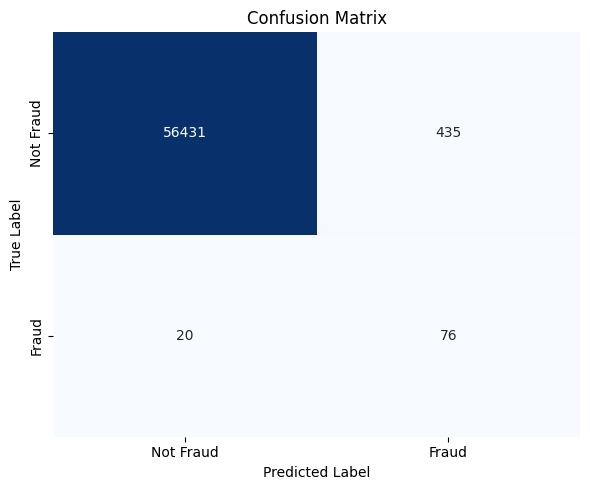

In [253]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [254]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [255]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9920122186720972
Sensitivity:- 0.7916666666666666
Specificity:- 0.9923504378714874


In [256]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.15      0.79      0.25        96

    accuracy                           0.99     56962
   macro avg       0.57      0.89      0.62     56962
weighted avg       1.00      0.99      0.99     56962



In [257]:
# Predicted probability
y_test_pred_proba = dt_bal_ros_model.predict_proba(X_test)[:,1]

In [258]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

np.float64(0.894860102404483)

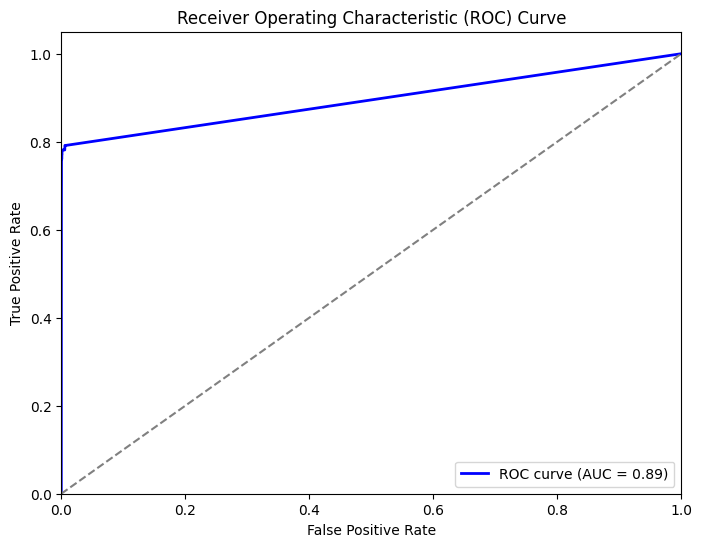

In [259]:
# Re-import auc from sklearn.metrics to ensure correct function is used
from sklearn.metrics import auc, roc_curve

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 0.99
    - ROC-AUC = 1.00
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.79
    - Specificity = 0.99
    - ROC-AUC = 0.89

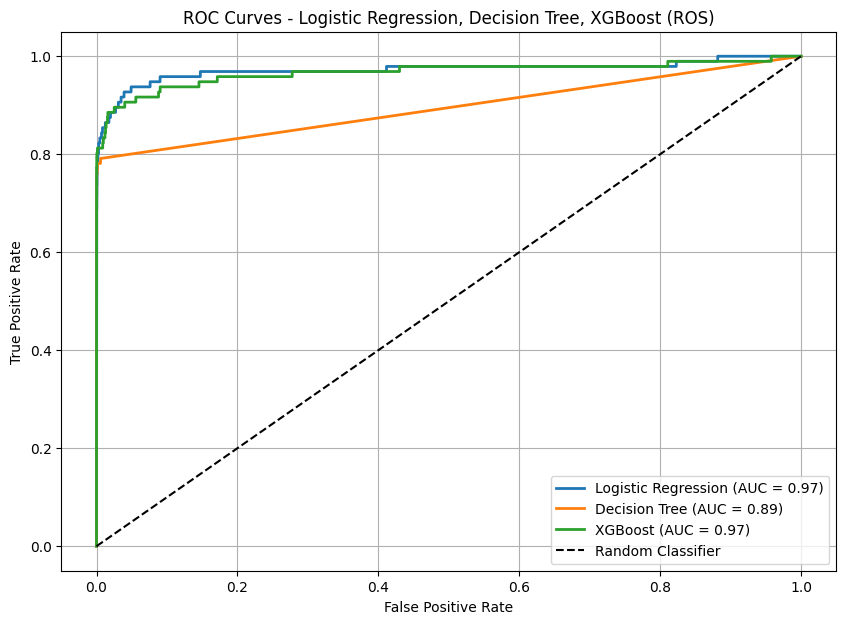

In [260]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predicted probabilities on the test set
y_test_pred_proba_logreg = logistic_bal_ros_model.predict_proba(X_test)[:, 1]
y_test_pred_proba_dt = dt_bal_ros_model.predict_proba(X_test)[:, 1]
y_test_pred_proba_xgb = xgb_bal_ros_model.predict_proba(X_test)[:, 1]

# Compute FPR, TPR, AUC
fpr_log, tpr_log, _ = roc_curve(y_test, y_test_pred_proba_logreg)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_pred_proba_dt)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_test_pred_proba_xgb)

auc_log = auc(fpr_log, tpr_log)
auc_dt = auc(fpr_dt, tpr_dt)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot all ROC curves
plt.figure(figsize=(10, 7))

plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})', linewidth=2)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', linewidth=2)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})', linewidth=2)

# Random line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Plot formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Logistic Regression, Decision Tree, XGBoost (ROS)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## SMOTE (Synthetic Minority Oversampling Technique)

We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [261]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [262]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [263]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (227845, 29)
After SMOTE oversampling X_train shape= (454898, 29)


### Logistic Regression

In [264]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [265]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       1.537233      0.318637         0.050864        0.017567     0.01   
1       1.488416      0.347170         0.048934        0.011288     0.10   
2       1.367741      0.088724         0.040157        0.000323     1.00   
3       1.539965      0.401083         0.056023        0.019125    10.00   
4       1.443389      0.188617         0.052959        0.018077   100.00   
5       1.492418      0.319002         0.040852        0.000661  1000.00   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.989807           0.989807           0.989494   
1   {'C': 0.1}           0.989844           0.989820           0.989503   
2     {'C': 1}           0.989847           0.989825           0.989502   
3    {'C': 10}           0.989847           0.989825           0.989502   
4   {'C': 100}           0.989847           0.989825           0.989502   
5  {'C': 1000}           0.989847           0.989825           0.989502   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.989635           0.989915         0.989731        0.000149   
1           0.989646           0.989952         0.989753        0.000159   
2           0.989644           0.989955         0.989755        0.000161   
3           0.989644           0.989955         0.989755        0.000161   
4           0.989644           0.989955         0.989755        0.000161   
5           0.989644           0.989955         0.989755        0.000161   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.989764            0.989675   
1                5            0.989795            0.989696   
2                4            0.989797            0.989701   
3                3            0.989797            0.989701   
4                2            0.989797            0.989701   
5                1            0.989797            0.989701   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.989768            0.989844            0.989688   
1            0.989784            0.989864            0.989712   
2            0.989785            0.989865            0.989713   
3            0.989785            0.989865            0.989714   
4            0.989785            0.989865            0.989714   
5            0.989785            0.989865            0.989714   

   mean_train_score  std_train_score  
0          0.989748         0.000061  
1          0.989770         0.000061  
2          0.989772         0.000060  
3          0.989772         0.000060  
4          0.989772         0.000060  
5          0.989772         0.000060

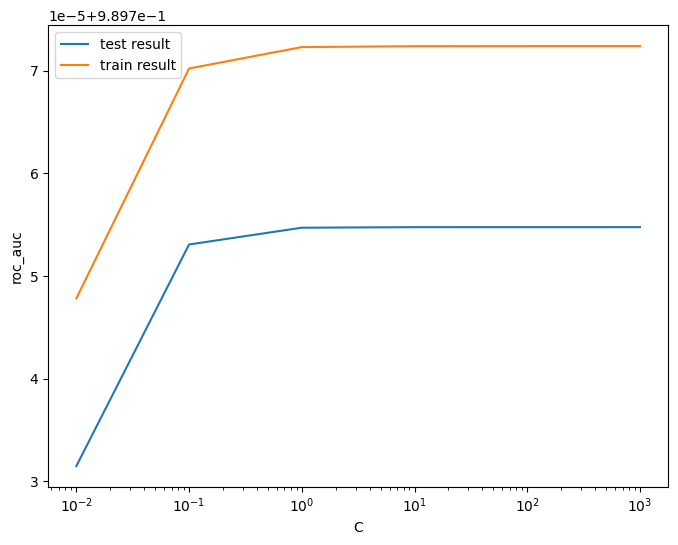

In [266]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [267]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9897547669810569 at C = 1000


#### Logistic regression with optimal C

In [268]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)

In [269]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

##### Prediction on the train set

In [270]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

In [271]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[221887   5562]
 [ 17687 209762]]


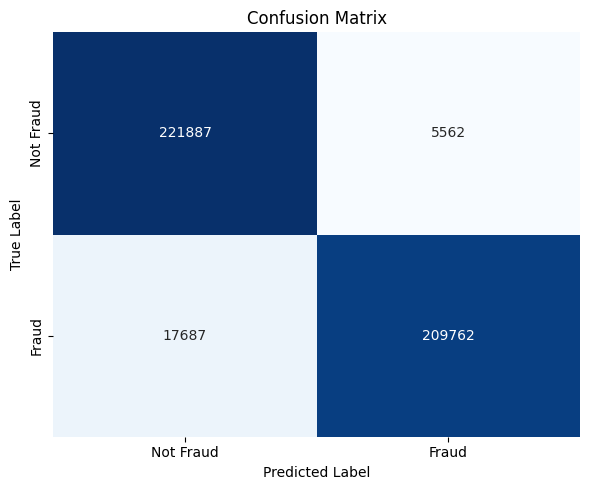

In [277]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [272]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [273]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9488918394892921
Sensitivity:- 0.9222375125852389
Specificity:- 0.9755461663933453


In [274]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.97      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [275]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

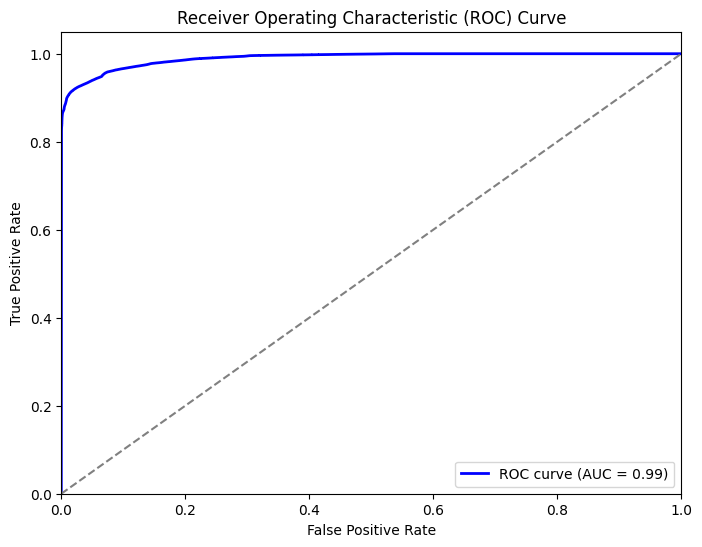

In [276]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

#### Prediction on the test set

In [278]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

In [279]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55416  1450]
 [   10    86]]


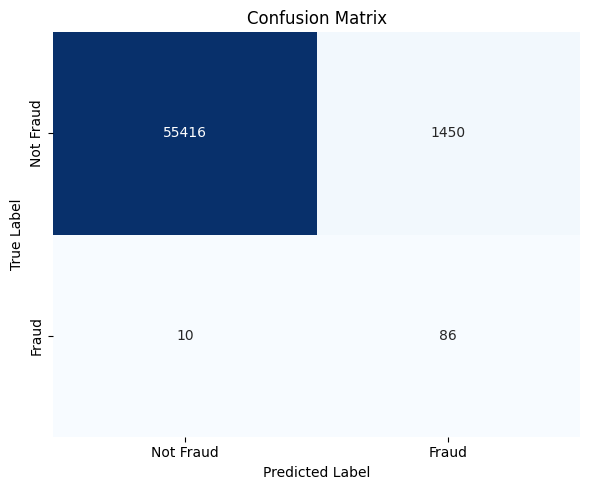

In [280]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [281]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [282]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9743688774972789
Sensitivity:- 0.8958333333333334
Specificity:- 0.9745014595716245


In [283]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.06      0.90      0.11        96

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



##### ROC on the test set

In [284]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

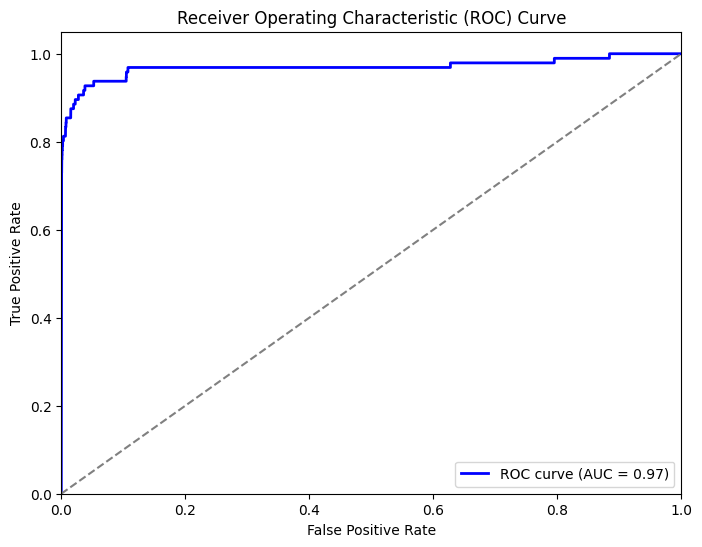

In [285]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.95
    - Sensitivity = 0.92
    - Specificity = 0.98
    - ROC = 0.99
- Test set
    - Accuracy = 0.97
    - Sensitivity = 0.90
    - Specificity = 0.97
    - ROC = 0.97

### XGBoost

In [286]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [287]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.159839      0.811929         0.240957        0.007438   
1       7.494535      0.830296         0.248165        0.012468   
2       7.894979      1.499582         0.252585        0.024443   
3       7.438249      0.808987         0.236352        0.002057   
4       7.608912      0.821872         0.232622        0.001772   
5       7.443696      0.790565         0.238687        0.000045   

   param_learning_rate  param_subsample  \
0                  0.2              0.3   
1                  0.2              0.6   
2                  0.2              0.9   
3                  0.6              0.3   
4                  0.6              0.6   
5                  0.6              0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.999675   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.999648   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.999657   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.999932   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.999964   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.999963   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999729           0.999679         0.999694        0.000024   
1           0.999719           0.999656         0.999674        0.000032   
2           0.999730           0.999654         0.999680        0.000035   
3           0.999958           0.999948         0.999946        0.000011   
4           0.999953           0.999957         0.999958        0.000005   
5           0.999949           0.999958         0.999957        0.000006   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.999725            0.999712   
1                6            0.999702            0.999709   
2                5            0.999712            0.999714   
3                3            0.999967            0.999968   
4                1            0.999977            0.999979   
5                2            0.999977            0.999976   

   split2_train_score  mean_train_score  std_train_score  
0            0.999720          0.999719         0.000005  
1            0.999721          0.999711         0.000008  
2            0.999703          0.999710         0.000005  
3            0.999977          0.999971         0.000005  
4            0.999979          0.999978         0.000001  
5            0.999981          0.999978         0.000002

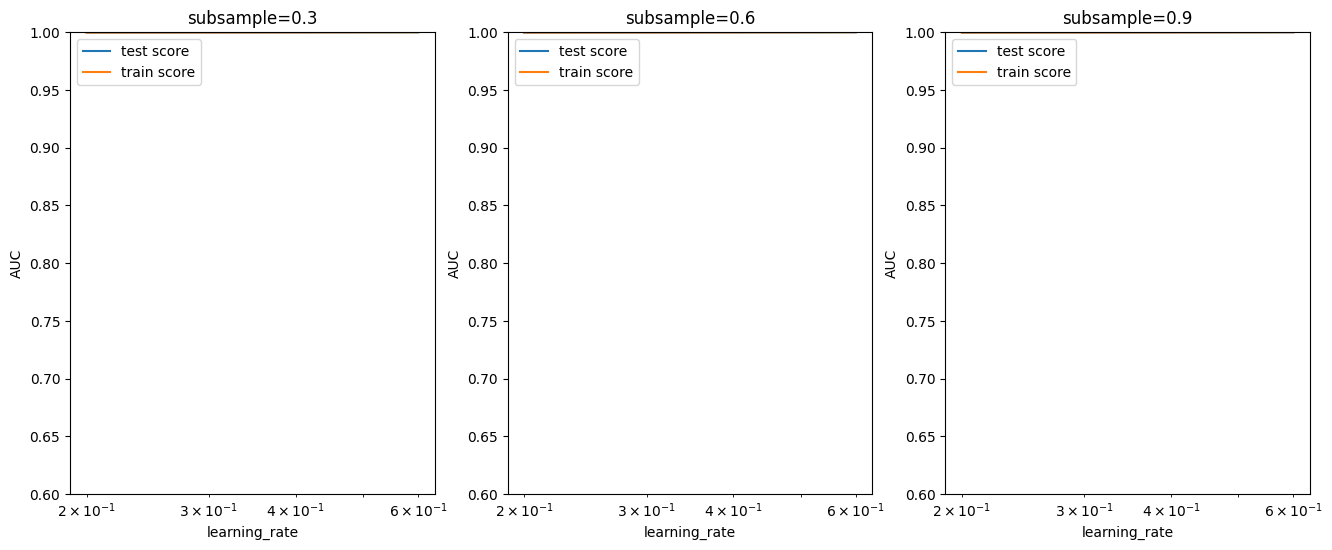

In [288]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [289]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [290]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

##### Prediction on the train set

In [291]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [292]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[227448      1]
 [     0 227449]]


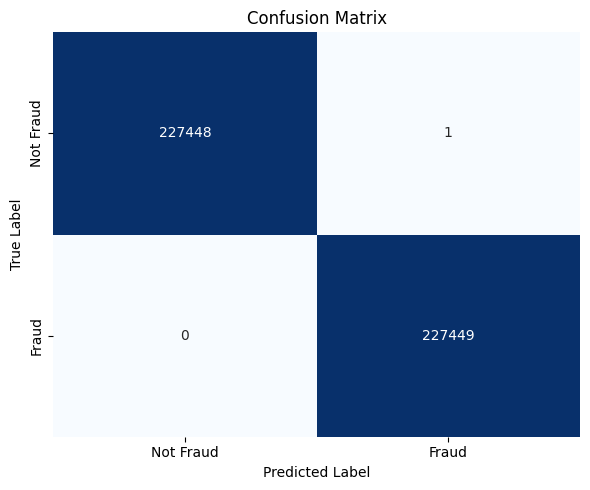

In [293]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [294]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [295]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9999978017049976
Sensitivity:- 1.0
Specificity:- 0.9999956034099952


In [296]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [297]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [298]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

np.float64(0.9999999890785479)

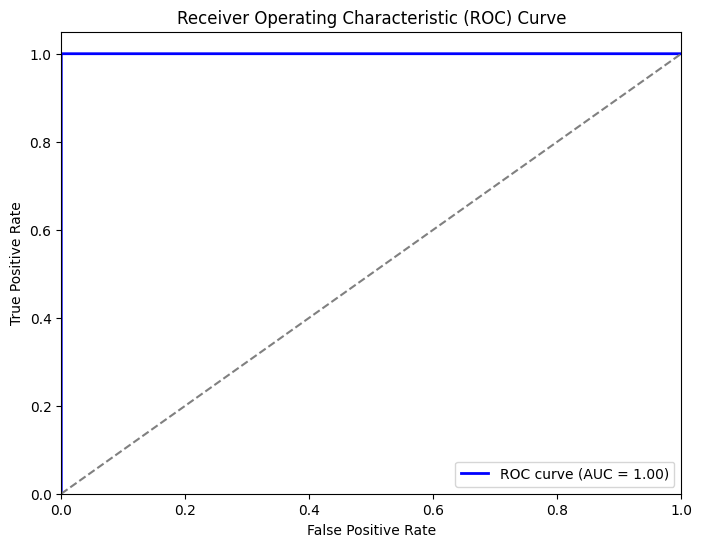

In [299]:
# Re-import auc from sklearn.metrics to ensure correct function is used
from sklearn.metrics import auc, roc_curve

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

##### Prediction on the test set

In [300]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

In [301]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56833    33]
 [   20    76]]


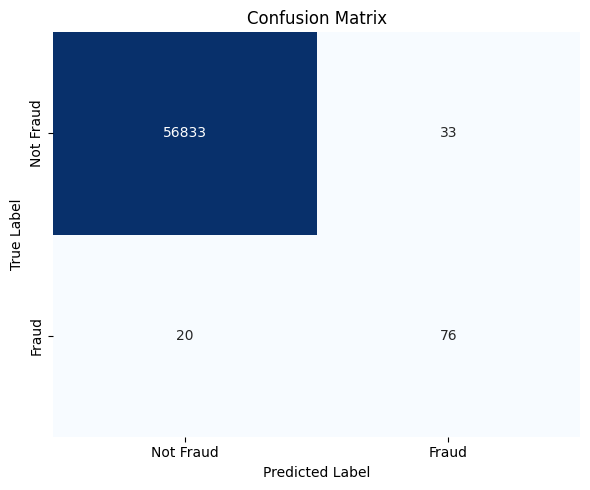

In [302]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [303]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [304]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9990695551420246
Sensitivity:- 0.7916666666666666
Specificity:- 0.9994196883902507


In [305]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.70      0.79      0.74        96

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [306]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

In [307]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

np.float64(0.9553290117703608)

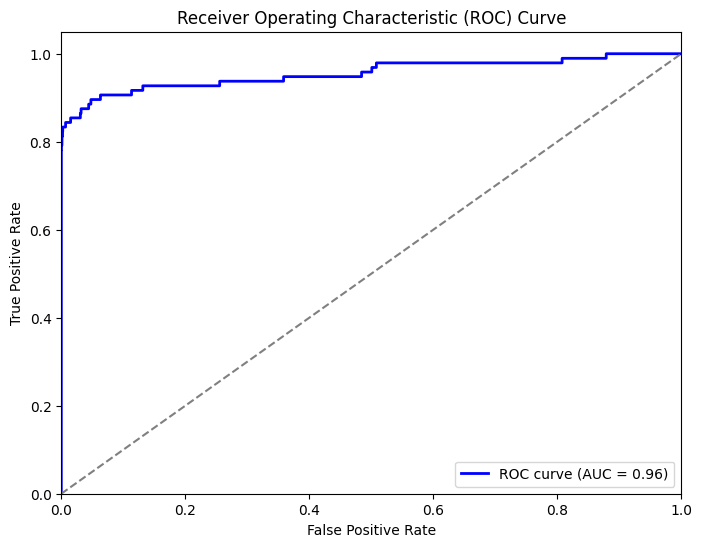

In [308]:
# Re-import auc from sklearn.metrics to ensure correct function is used
from sklearn.metrics import auc, roc_curve

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 0.99
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.79
    - Specificity = 0.99
    - ROC-AUC = 0.96

Overall, the model is performing well in the test set, what it had learnt from the train set.

### Decision Tree

In [309]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [310]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      10.894135      0.261154         0.051996        0.006891   
1      11.112955      0.121401         0.046178        0.000630   
2      10.985198      0.032987         0.045298        0.000384   
3      10.747469      0.214791         0.050370        0.007470   
4      20.456887      0.464230         0.055923        0.007650   
5      20.671890      0.153305         0.062002        0.009464   
6      20.442426      0.226316         0.061566        0.009490   
7      20.989177      0.558645         0.064138        0.011161   

   param_max_depth  param_min_samples_leaf  param_min_samples_split  \
0                5                      50                       50   
1                5                      50                      100   
2                5                     100                       50   
3                5                     100                      100   
4               10                      50                       50   
5               10                      50                      100   
6               10                     100                       50   
7               10                     100                      100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.986116   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.986127   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.986057   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.986068   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.998160   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.998160   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.998135   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.998083   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.985690           0.984837         0.985548        0.000532   
1           0.985690           0.984838         0.985552        0.000535   
2           0.985642           0.984771         0.985490        0.000536   
3           0.985638           0.984773         0.985493        0.000539   
4           0.998142           0.997950         0.998084        0.000095   
5           0.998108           0.998011         0.998093        0.000062   
6           0.998107           0.997921         0.998054        0.000095   
7           0.998037           0.997905         0.998008        0.000076   

   rank_test_score  
0                6  
1                5  
2                8  
3                7  
4                2  
5                1  
6                3  
7                4

In [311]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9980927224722395
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [312]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

##### Prediction on the train set

In [313]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

In [314]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[223809   3640]
 [  2374 225075]]


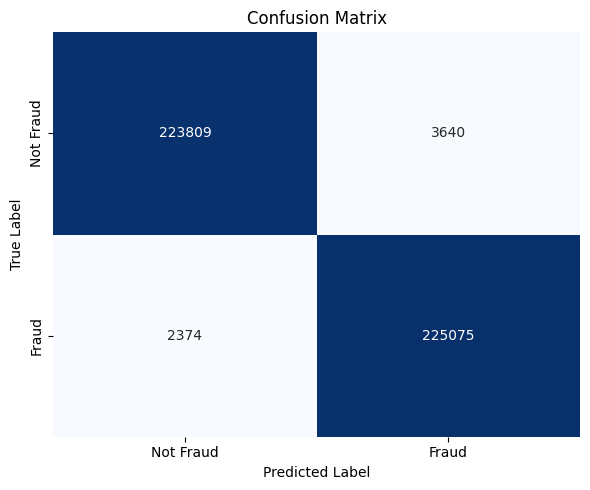

In [315]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [316]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [317]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9867794538555896
Sensitivity:- 0.9895624953286232
Specificity:- 0.9839964123825561


In [318]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    227449
           1       0.98      0.99      0.99    227449

    accuracy                           0.99    454898
   macro avg       0.99      0.99      0.99    454898
weighted avg       0.99      0.99      0.99    454898



In [319]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [320]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

np.float64(0.9986355757920081)

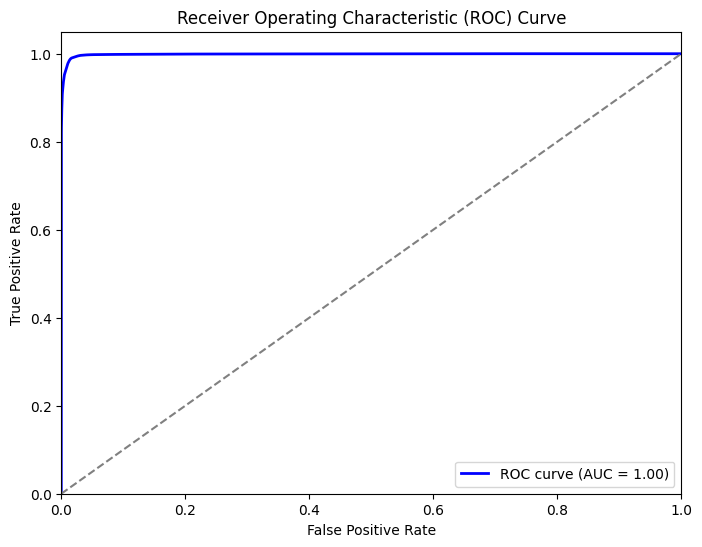

In [321]:
# Re-import auc from sklearn.metrics to ensure correct function is used
from sklearn.metrics import auc, roc_curve

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

##### Prediction on the test set

In [322]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)

In [323]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55852  1014]
 [   19    77]]


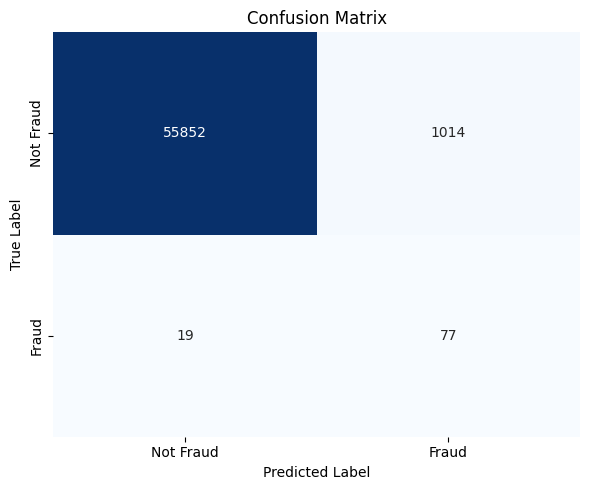

In [325]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [326]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [327]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9818651030511569
Sensitivity:- 0.8020833333333334
Specificity:- 0.9821686069004326


In [328]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.80      0.13        96

    accuracy                           0.98     56962
   macro avg       0.54      0.89      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [329]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

In [330]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

np.float64(0.8551876157692353)

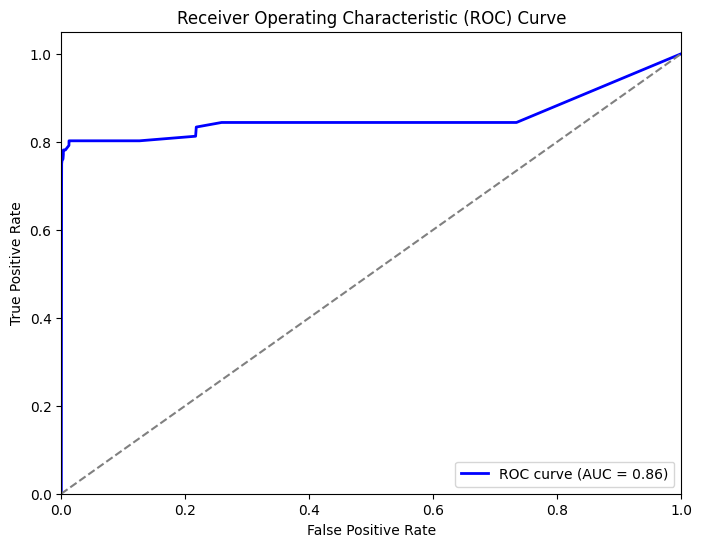

In [331]:
# Re-import auc from sklearn.metrics to ensure correct function is used
from sklearn.metrics import auc, roc_curve

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 0.99
    - Specificity = 0.98
    - ROC-AUC = 1.00
- Test set
    - Accuracy = 0.98
    - Sensitivity = 0.80
    - Specificity = 0.98
    - ROC-AUC = 0.86


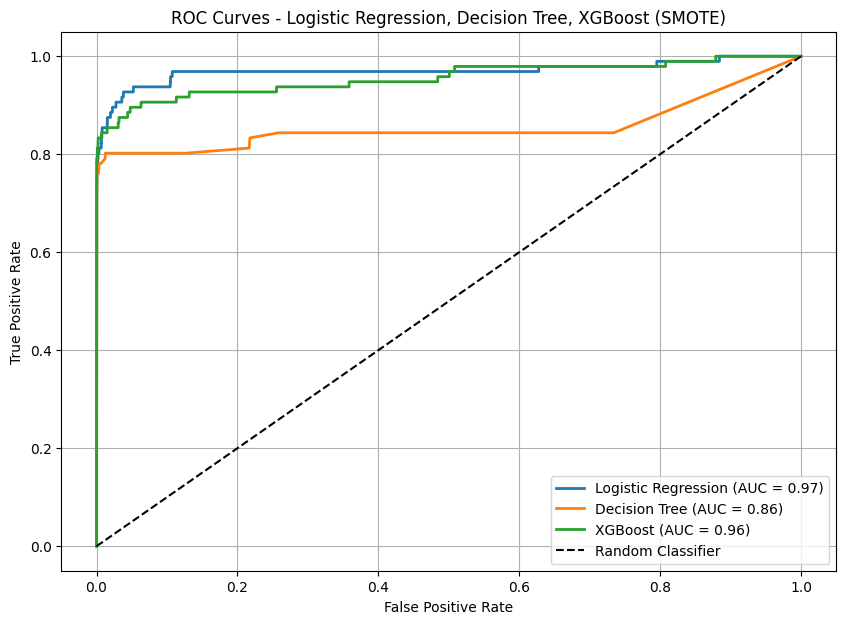

In [332]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predicted probabilities on the test set for each model
y_test_pred_proba_logreg = logistic_bal_smote_model.predict_proba(X_test)[:, 1]
y_test_pred_proba_dt = dt_bal_smote_model.predict_proba(X_test)[:, 1]
y_test_pred_proba_xgb = xgb_bal_smote_model.predict_proba(X_test)[:, 1]

# Compute FPR, TPR, AUC
fpr_log, tpr_log, _ = roc_curve(y_test, y_test_pred_proba_logreg)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_pred_proba_dt)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_test_pred_proba_xgb)

auc_log = auc(fpr_log, tpr_log)
auc_dt = auc(fpr_dt, tpr_dt)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot all ROC curves
plt.figure(figsize=(10, 7))

plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})', linewidth=2)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', linewidth=2)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})', linewidth=2)

# Random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Final formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Logistic Regression, Decision Tree, XGBoost (SMOTE)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


##AdaSyn (Adaptive Synthetic Sampling)

In [333]:
# Importing adasyn
from imblearn.over_sampling import ADASYN

In [334]:
# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [335]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_adasyn))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227448})


### Logistic Regression

In [336]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [337]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       1.414438      0.362421         0.095695        0.038189     0.01   
1       1.432422      0.228845         0.068806        0.001680     0.10   
2       1.275675      0.020016         0.068221        0.000833     1.00   
3       1.676403      0.348475         0.075271        0.008589    10.00   
4       1.273305      0.022372         0.070508        0.001422   100.00   
5       1.280571      0.025788         0.069855        0.000576  1000.00   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.963486           0.962321           0.963286   
1   {'C': 0.1}           0.963598           0.962445           0.963375   
2     {'C': 1}           0.963600           0.962453           0.963379   
3    {'C': 10}           0.963600           0.962454           0.963380   
4   {'C': 100}           0.963600           0.962454           0.963380   
5  {'C': 1000}           0.963600           0.962454           0.963380   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.963031        0.000509                6            0.962783   
1         0.963139        0.000499                5            0.962901   
2         0.963144        0.000497                4            0.962905   
3         0.963145        0.000496                3            0.962906   
4         0.963145        0.000496                2            0.962906   
5         0.963145        0.000496                1            0.962906   

   split1_train_score  split2_train_score  mean_train_score  std_train_score  
0            0.963208            0.963184          0.963059         0.000195  
1            0.963314            0.963277          0.963164         0.000187  
2            0.963320            0.963282          0.963169         0.000187  
3            0.963321            0.963282          0.963170         0.000187  
4            0.963321            0.963282          0.963170         0.000187  
5            0.963321            0.963282          0.963170         0.000187

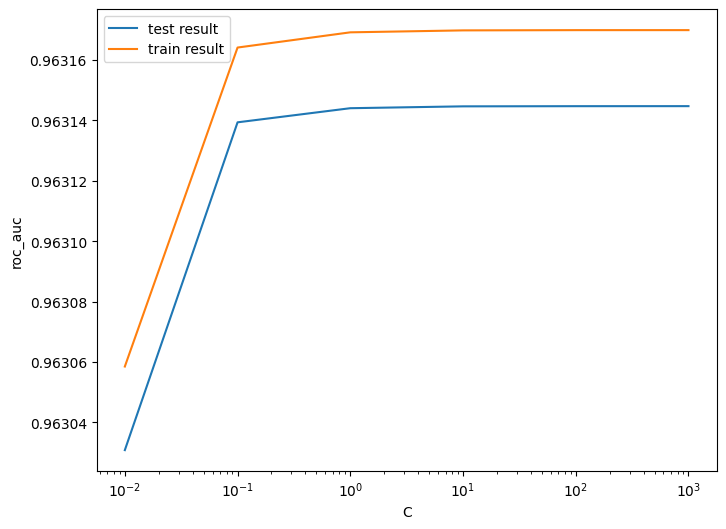

In [338]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [339]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9631447476364444 at C = 1000


#### Logistic regression with optimal C

In [340]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

In [341]:
# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

##### Prediction on the train set

In [342]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

In [343]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[207033  20416]
 [ 31286 196162]]


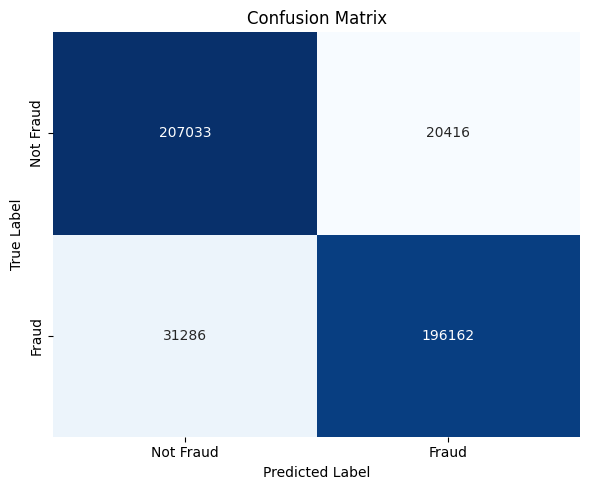

In [344]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [345]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [346]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))

Accuracy:- 0.886343501935603
Sensitivity:- 0.862447680348915
Specificity:- 0.9102392184621607
F1-Score:- 0.8835608725615167


In [347]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89    227449
           1       0.91      0.86      0.88    227448

    accuracy                           0.89    454897
   macro avg       0.89      0.89      0.89    454897
weighted avg       0.89      0.89      0.89    454897



In [348]:
# Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [349]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

np.float64(0.9631757345452517)

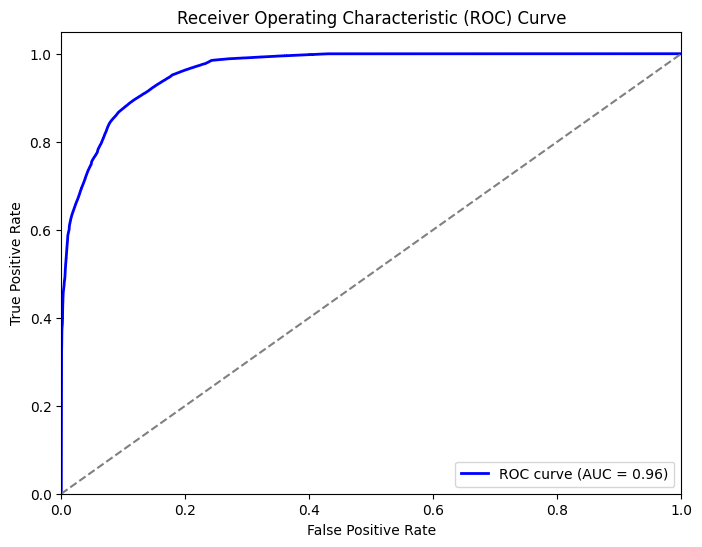

In [350]:
# Re-import auc from sklearn.metrics to ensure correct function is used
from sklearn.metrics import auc, roc_curve

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Prediction on the test set

In [351]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

In [352]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[51643  5223]
 [    4    92]]


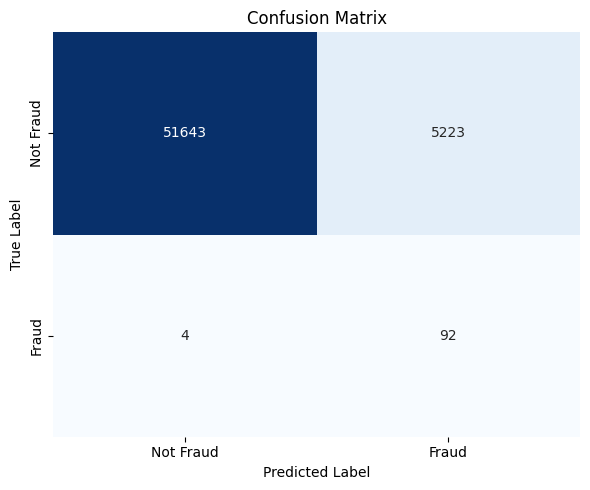

In [353]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [354]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [355]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9082370703275868
Sensitivity:- 0.9583333333333334
Specificity:- 0.908152498856962


In [356]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56866
           1       0.02      0.96      0.03        96

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962



In [357]:
# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

In [358]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

np.float64(0.9671461747793058)

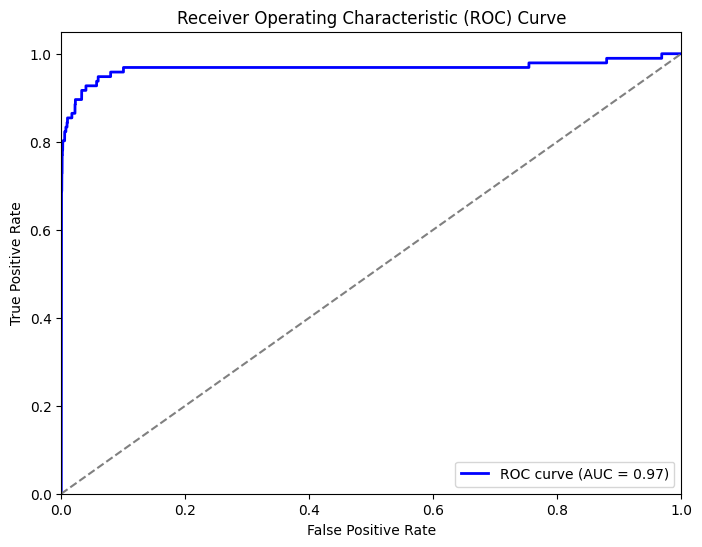

In [359]:
# Re-import auc from sklearn.metrics to ensure correct function is used
from sklearn.metrics import auc, roc_curve

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.88
    - Sensitivity = 0.86
    - Specificity = 0.91
    - ROC = 0.96
- Test set
    - Accuracy = 0.90
    - Sensitivity = 0.95
    - Specificity = 0.90
    - ROC = 0.97

### Decision Tree

In [360]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [361]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      11.041164      0.049163         0.059955        0.017014   
1      11.048487      0.161611         0.049212        0.001743   
2      11.068115      0.161879         0.055439        0.009192   
3      10.909593      0.095679         0.048193        0.001143   
4      19.649509      0.553481         0.049694        0.000369   
5      19.755475      0.564194         0.058249        0.010722   
6      19.572460      0.516723         0.050398        0.000312   
7      19.511016      0.326267         0.053081        0.002399   

   param_max_depth  param_min_samples_leaf  param_min_samples_split  \
0                5                      50                       50   
1                5                      50                      100   
2                5                     100                       50   
3                5                     100                      100   
4               10                      50                       50   
5               10                      50                      100   
6               10                     100                       50   
7               10                     100                      100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.902958   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.902958   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.902958   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.902958   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.935250   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.933899   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.935453   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.936687   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.920355           0.909332         0.910882        0.007186   
1           0.920356           0.909332         0.910882        0.007187   
2           0.920316           0.912920         0.912065        0.007112   
3           0.920311           0.910801         0.911357        0.007095   
4           0.946363           0.935842         0.939152        0.005105   
5           0.946304           0.938783         0.939662        0.005102   
6           0.943381           0.940946         0.939927        0.003316   
7           0.946937           0.941799         0.941807        0.004185   

   rank_test_score  
0                8  
1                7  
2                5  
3                6  
4                4  
5                3  
6                2  
7                1

In [362]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9418074398725262
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


In [363]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [364]:
# Predictions on the train set
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

In [365]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[215929  11520]
 [  1118 226330]]


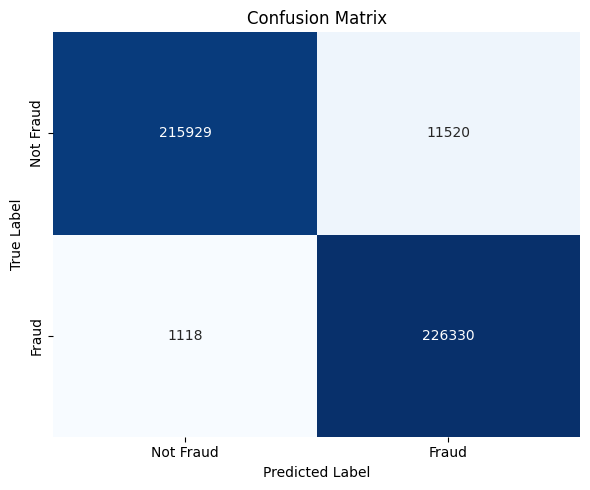

In [366]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [367]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [368]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9722178866864367
Sensitivity:- 0.9950845907636031
Specificity:- 0.9493512831447929


In [369]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    227449
           1       0.95      1.00      0.97    227448

    accuracy                           0.97    454897
   macro avg       0.97      0.97      0.97    454897
weighted avg       0.97      0.97      0.97    454897



In [370]:
# Predicted probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [371]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

np.float64(0.9917591040224101)

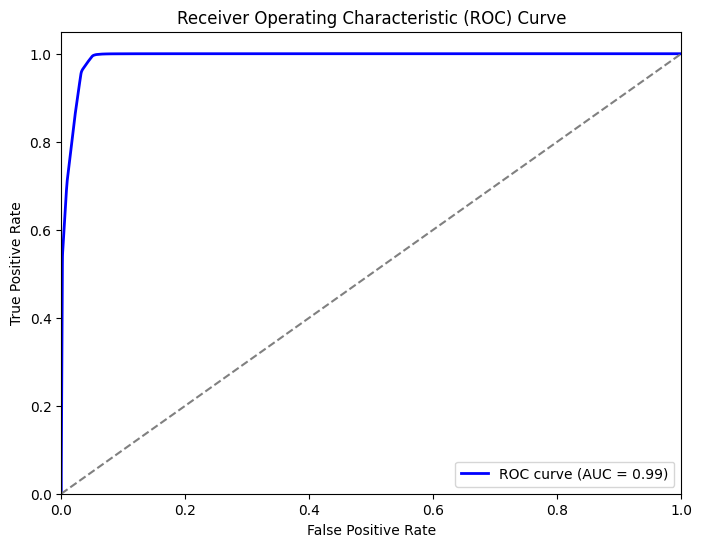

In [372]:
# Re-import auc from sklearn.metrics to ensure correct function is used
from sklearn.metrics import auc, roc_curve

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

##### Prediction on the test set

In [373]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)

In [374]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[53880  2986]
 [   15    81]]


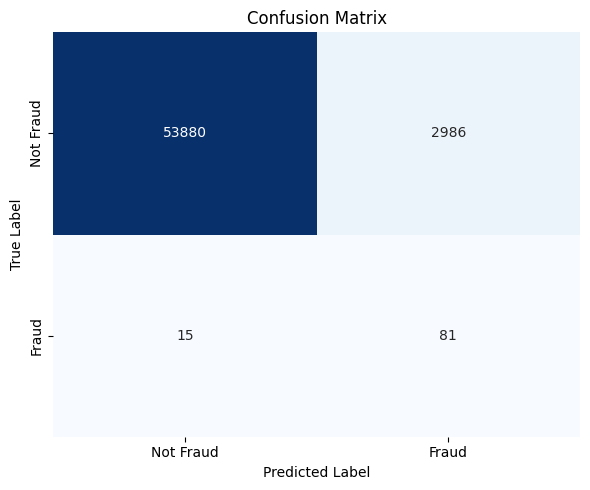

In [375]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [376]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [377]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9473157543625575
Sensitivity:- 0.84375
Specificity:- 0.9474905919178419


In [378]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56866
           1       0.03      0.84      0.05        96

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.95      0.97     56962



In [379]:
# Predicted probability
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

In [380]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

np.float64(0.9141440147305362)

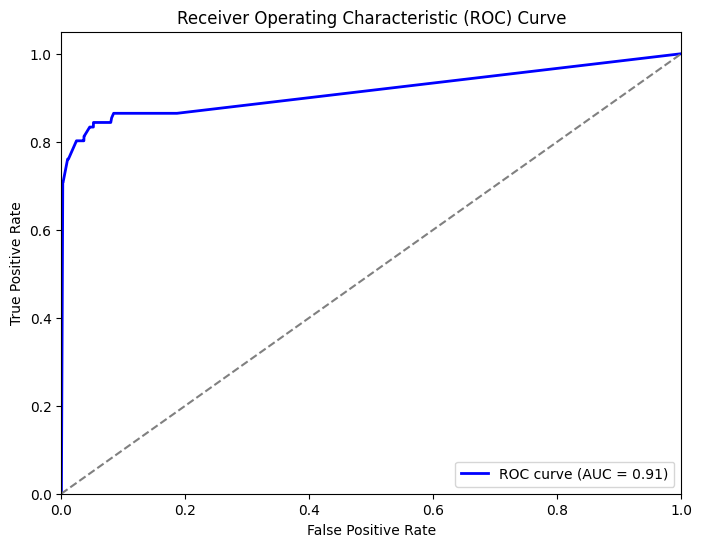

In [381]:
# Re-import auc from sklearn.metrics to ensure correct function is used
from sklearn.metrics import auc, roc_curve

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.97
    - Sensitivity = 0.99
    - Specificity = 0.95
    - ROC-AUC = 0.99
- Test set
    - Accuracy = 0.95
    - Sensitivity = 0.84
    - Specificity = 0.95
    - ROC-AUC = 0.91

### XGBoost

In [382]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [383]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       6.950766      0.825031         0.261746        0.016672   
1       7.009677      0.796616         0.245588        0.001592   
2       6.968047      0.891759         0.243540        0.000945   
3       7.116337      0.807286         0.242942        0.001919   
4       6.717889      0.894683         0.292920        0.068980   
5       6.717053      0.717278         0.244950        0.003355   

   param_learning_rate  param_subsample  \
0                  0.2              0.3   
1                  0.2              0.6   
2                  0.2              0.9   
3                  0.6              0.3   
4                  0.6              0.6   
5                  0.6              0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.975484   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.978568   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.975497   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.970280   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.980396   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.978029   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.996111           0.994796         0.988797        0.009429   
1           0.996275           0.994438         0.989761        0.007949   
2           0.995795           0.995089         0.988794        0.009407   
3           0.995986           0.997243         0.987836        0.012425   
4           0.995514           0.996559         0.990823        0.007385   
5           0.995482           0.997311         0.990274        0.008691   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.999302            0.998994   
1                3            0.999290            0.998966   
2                5            0.999231            0.998957   
3                6            0.999918            0.999933   
4                1            0.999940            0.999937   
5                2            0.999930            0.999936   

   split2_train_score  mean_train_score  std_train_score  
0            0.999229          0.999175         0.000132  
1            0.999181          0.999146         0.000135  
2            0.999148          0.999112         0.000115  
3            0.999941          0.999931         0.000009  
4            0.999940          0.999939         0.000001  
5            0.999952          0.999939         0.000009

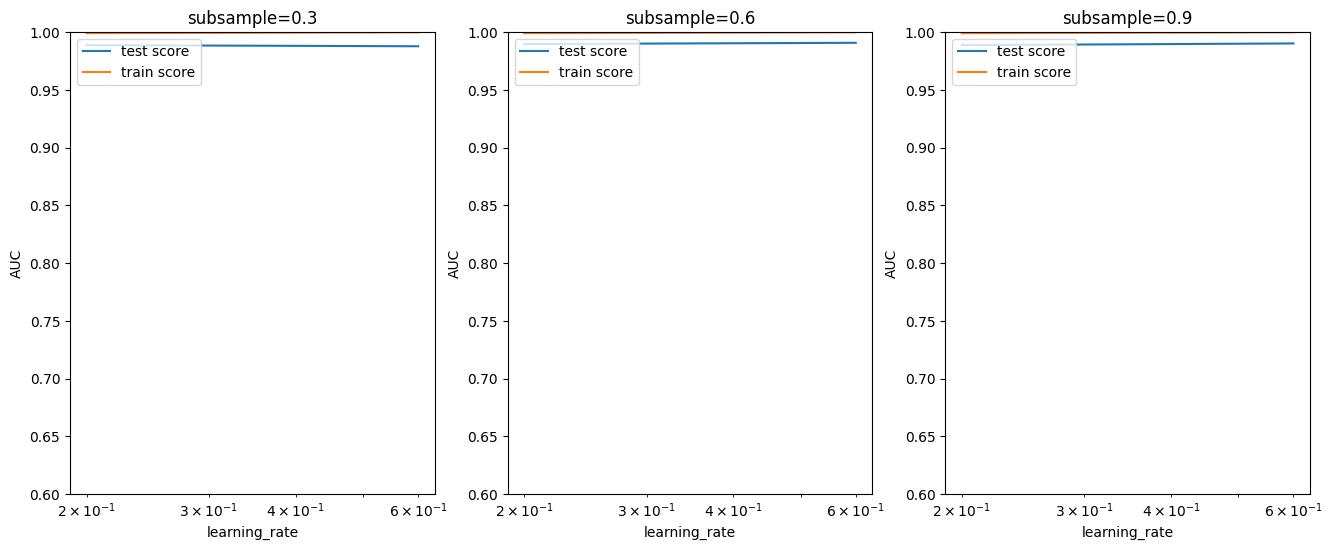

In [385]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [386]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [387]:
# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3}, ...)

##### Prediction on the train set

In [388]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

In [389]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn)
print(confusion)

[[227449      0]
 [     0 227448]]


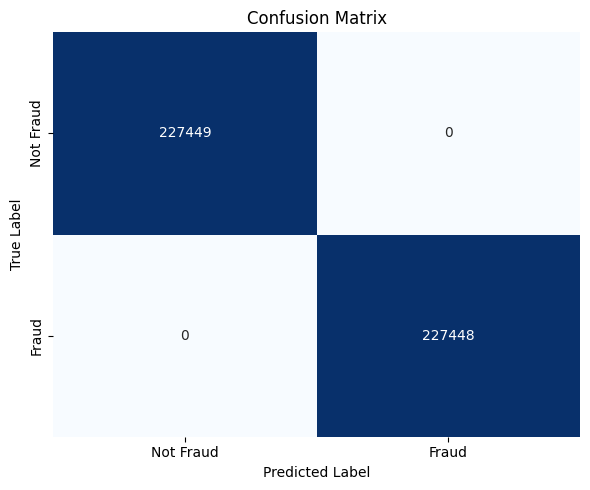

In [391]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [392]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [393]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9999934051004953
Sensitivity:- 1.0
Specificity:- 1.0


In [394]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227448

    accuracy                           1.00    454897
   macro avg       1.00      1.00      1.00    454897
weighted avg       1.00      1.00      1.00    454897



In [395]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [396]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

np.float64(1.0)

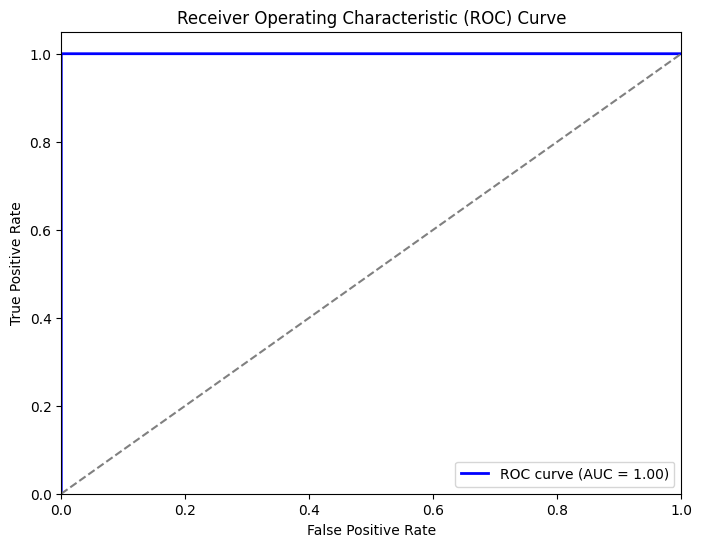

In [397]:
# Re-import auc from sklearn.metrics to ensure correct function is used
from sklearn.metrics import auc, roc_curve

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

##### Prediction on the test set

In [398]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

In [399]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56828    38]
 [   22    74]]


In [400]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [401]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9989466661985184
Sensitivity:- 0.7708333333333334
Specificity:- 0.9993317623887736


In [402]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.66      0.77      0.71        96

    accuracy                           1.00     56962
   macro avg       0.83      0.89      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [403]:
# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

In [404]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

np.float64(0.951038589256615)

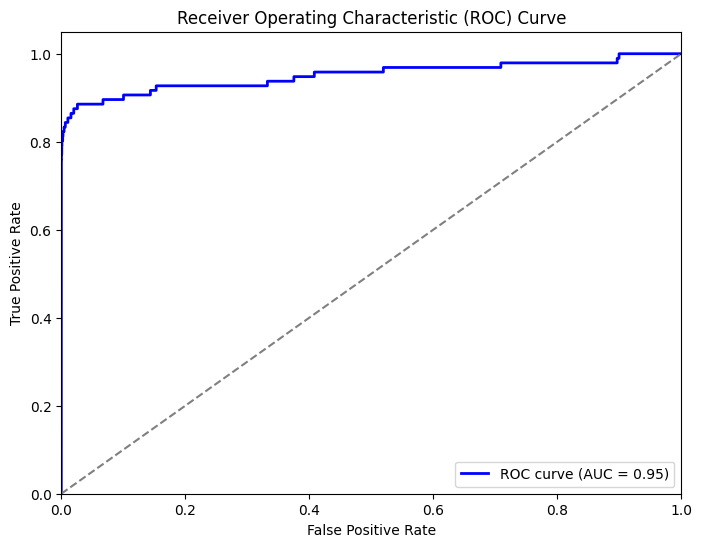

In [405]:
# Re-import auc from sklearn.metrics to ensure correct function is used
from sklearn.metrics import auc, roc_curve

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.77
    - Specificity = 0.99
    - ROC-AUC = 0.95

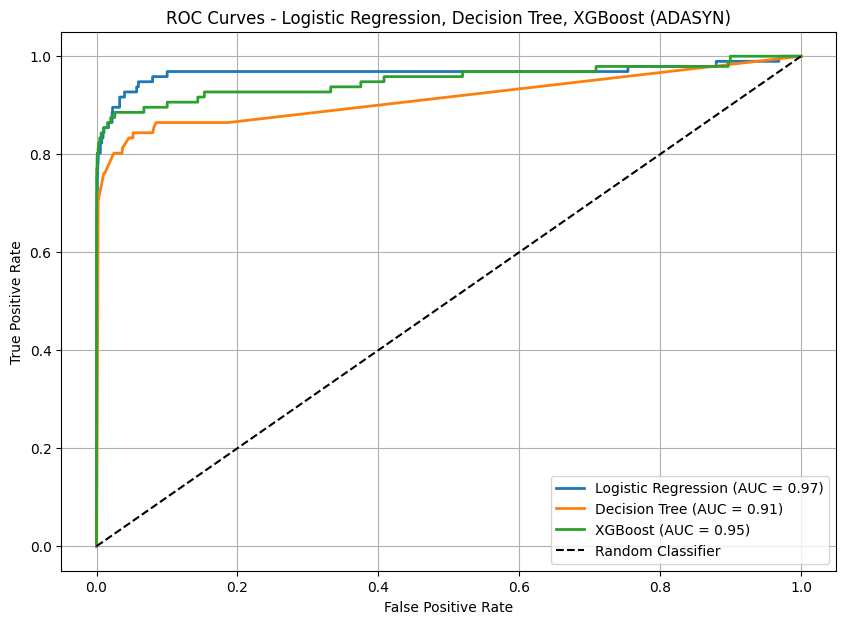

In [406]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predicted probabilities on the test set
y_test_pred_proba_logreg = logistic_bal_adasyn_model.predict_proba(X_test)[:, 1]
y_test_pred_proba_dt = dt_bal_adasyn_model.predict_proba(X_test)[:, 1]
y_test_pred_proba_xgb = xgb_bal_adasyn_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for each model
fpr_log, tpr_log, _ = roc_curve(y_test, y_test_pred_proba_logreg)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_pred_proba_dt)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_test_pred_proba_xgb)

auc_log = auc(fpr_log, tpr_log)
auc_dt = auc(fpr_dt, tpr_dt)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot all ROC curves
plt.figure(figsize=(10, 7))

plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})', linewidth=2)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', linewidth=2)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})', linewidth=2)

# Random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Final plot formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Logistic Regression, Decision Tree, XGBoost (ADASYN)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Choosing best model on the balanced data

He we balanced the data with various approach such as Undersampling, Oversampling, SMOTE and Adasy. With every data balancing thechnique we built several models such as Logistic, XGBoost, Decision Tree, and Random Forest.

We can see that almost all the models performed more or less good. But we should be interested in the best model.

Though the Undersampling technique models performed well, we should keep mind that by doing the undersampling some imformation were lost. Hence, it is better not to consider the undersampling models.

Whereas the SMOTE and Adasyn models performed well. Among those models the simplist model Logistic regression has ROC score 0.99 in the train set and 0.97 on the test set. We can consider the Logistic model as the best model to choose because of the easy interpretation of the models and also the resourse requirements to build the mdoel is lesser than the other heavy models such as Random forest or XGBoost.

Hence, we can conclude that the `Logistic regression model with SMOTE` is the best model for its simlicity and less resource requirement.

#### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [ ]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9897681302852576
Threshold= 0.5322737615593742


We can see that the threshold is 0.53, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

**SAVE BEST MODEL**

In [ ]:
import pickle

# Save the model
with open("logistic_bal_smote_model.pkl", "wb") as file:
    pickle.dump(logistic_bal_smote_model, file)

print("Model saved successfully as logistic_bal_smote_model.pkl")


Model saved successfully as logistic_bal_smote_model.pkl


In [ ]:
# Save the scaler for later use
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

In [ ]:
import joblib

# Save the best model to a file
joblib.dump(logistic_bal_smote_model, "logistic_bal_smote_model.pkl")

print("Model saved successfully as logistic_bal_smote_model.pkl")


Model saved successfully as logistic_bal_smote_model.pkl


## Cost benefit analysis
We have tried several models till now with both balanced and imbalanced data. We have noticed most of the models have performed more or less well in terms of ROC score, Precision and Recall.

But while picking the best model we should consider few things such as whether we have required infrastructure, resources or computational power to run the model or not. For the models such as Random forest, SVM, XGBoost we require heavy computational resources and eventually to build that infrastructure the cost of deploying the model increases. On the other hand the simpler model such as Logistic regression requires less computational resources, so the cost of building the model is less.

We also have to consider that for little change of the ROC score how much monetary loss of gain the bank incur. If the amount if huge then we have to consider building the complex model even though the cost of building the model is high.

## Summary to the business
For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, we can add the human element to verify whether the transaction was done by calling the customer. However, when precision is low, such tasks are a burden because the human element has to be increased.

For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So we have to consider the losses if the missed transaction was a high-value fraudulent one.

So here, to save the banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions.

After performing several models, we have seen that in the balanced dataset with SMOTE technique the simplest Logistic regression model has good ROC score and also high Recall. Hence, we can go with the logistic model here. It is also easier to interpret and explain to the business.